**Import Required Libraries**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, precision_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay


from scipy.fftpack import fft
from scipy.signal import find_peaks, welch
import pywt


# to ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Imporitng the Datasets from the google drive**

In [ ]:
flicker_df = pd.read_csv("/content/drive/MyDrive/PQ Analyze/Flicker.csv")
flicker_with_sag_df = pd.read_csv("/content/drive/MyDrive/PQ Analyze/Flicker_with_Sag.csv")
flicker_with_swell_df = pd.read_csv("/content/drive/MyDrive/PQ Analyze/Flicker_with_Swell.csv")
harmonics_df = pd.read_csv("/content/drive/MyDrive/PQ Analyze/Harmonics.csv")
harmonics_with_sag_df = pd.read_csv("/content/drive/MyDrive/PQ Analyze/Harmonics_with_Sag.csv")
harmonics_with_swell_df = pd.read_csv("/content/drive/MyDrive/PQ Analyze/Harmonics_with_Swell.csv")
interruption_df = pd.read_csv("/content/drive/MyDrive/PQ Analyze/Interruption.csv")
notch_df = pd.read_csv("/content/drive/MyDrive/PQ Analyze/Notch.csv")
oscillatory_transient_df = pd.read_csv("/content/drive/MyDrive/PQ Analyze/Oscillatory_Transient.csv")
pure_sinusoidal_df = pd.read_csv("/content/drive/MyDrive/PQ Analyze/Pure_Sinusoidal.csv")
sag_df = pd.read_csv("/content/drive/MyDrive/PQ Analyze/Sag.csv")
sag_with_harmonics_df = pd.read_csv("/content/drive/MyDrive/PQ Analyze/Swell_with_Harmonics.csv")
sag_with_oscillatory_transient_df = pd.read_csv("/content/drive/MyDrive/PQ Analyze/Swell_with_Oscillatory_Transient.csv")
swell_df = pd.read_csv("/content/drive/MyDrive/PQ Analyze/Swell.csv")
swell_with_harmonics_df = pd.read_csv("/content/drive/MyDrive/PQ Analyze/Swell_with_Harmonics.csv")
swell_with_oscillatory_transient_df = pd.read_csv("/content/drive/MyDrive/PQ Analyze/Swell_with_Oscillatory_Transient.csv")
transient_df = pd.read_csv("/content/drive/MyDrive/PQ Analyze/Transient.csv")

**Selecting a signal column for frequency domain analysis**

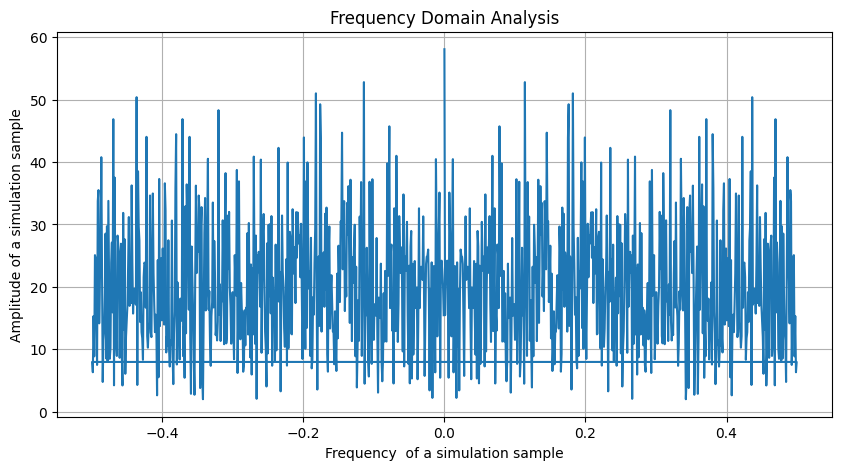

In [ ]:
column_to_analyze = harmonics_df.columns[0]
data = harmonics_df[column_to_analyze]

# Fourier Transform
frequency_spectrum = np.fft.fft(data)
frequencies = np.fft.fftfreq(len(data))


plt.figure(figsize=(10, 5))
plt.plot(frequencies, np.abs(frequency_spectrum))
plt.xlabel("Frequency  of a simulation sample")
plt.ylabel("Amplitude of a simulation sample")
plt.title(f"Frequency Domain Analysis")
plt.grid(True)
plt.show()

**Assigning class labels for power quality disturbances**

In [ ]:
flicker_df['class'] = 'Flicker'
flicker_with_sag_df['class'] = 'Flicker with Sag'
flicker_with_swell_df['class'] = 'Flicker with Swell'
harmonics_df['class'] = 'Harmonics'
harmonics_with_sag_df['class'] = 'Harmonics with Sag'
harmonics_with_swell_df['class'] = 'Harmonics with Swell'
interruption_df['class'] = 'Interruption'
notch_df['class'] = 'Notch'
oscillatory_transient_df['class'] = 'Oscillatory Transient'
pure_sinusoidal_df['class'] = 'Pure Sinusoidal'
sag_df['class'] = 'Sag'
sag_with_harmonics_df['class'] = 'Sag with Harmonics'
sag_with_oscillatory_transient_df['class'] = 'Sag with Oscillatory'
swell_df['class'] = 'Swell'
swell_with_harmonics_df['class'] = 'Swell with Harmonics'
swell_with_oscillatory_transient_df['class'] = 'Swell with Oscillatory Transient'
transient_df['class'] = 'Transient'

**Defining a function to rename columns consistently across the Datasets**

In [ ]:
def rename_columns(df):
    # Example: Rename columns as 'Column_1', 'Column_2', etc.
    new_column_names = [f"Column_{i+1}" for i in range(len(df.columns))]
    df.columns = new_column_names
    return df

**Applying consistent column naming for All PQ Dataframes**

In [ ]:
flicker_df = rename_columns(flicker_df)
flicker_with_sag_df = rename_columns(flicker_with_sag_df)
flicker_with_swell_df = rename_columns(flicker_with_swell_df)
harmonics_df = rename_columns(harmonics_df)
harmonics_with_sag_df = rename_columns(harmonics_with_sag_df)
harmonics_with_swell_df = rename_columns(harmonics_with_swell_df)
interruption_df = rename_columns(interruption_df)
notch_df = rename_columns(notch_df)
oscillatory_transient_df = rename_columns(oscillatory_transient_df)
pure_sinusoidal_df = rename_columns(pure_sinusoidal_df)
sag_df = rename_columns(sag_df)
sag_with_harmonics_df = rename_columns(sag_with_harmonics_df)
sag_with_oscillatory_transient_df = rename_columns(sag_with_oscillatory_transient_df)
swell_df = rename_columns(swell_df)
swell_with_harmonics_df = rename_columns(swell_with_harmonics_df)
swell_with_oscillatory_transient_df = rename_columns(swell_with_oscillatory_transient_df)
transient_df = rename_columns(transient_df)

**Combine all the data sets into a one DataFrame**

In [ ]:
combined_df = pd.concat([flicker_df, flicker_with_sag_df, flicker_with_swell_df, harmonics_df, harmonics_with_sag_df, harmonics_with_swell_df, interruption_df, notch_df, oscillatory_transient_df, pure_sinusoidal_df, sag_df, sag_with_harmonics_df,sag_with_oscillatory_transient_df, swell_df,swell_with_harmonics_df, swell_with_oscillatory_transient_df, transient_df], axis=0)
combined_df.shape

(16983, 101)

**Random Sampling and final dataset formatting**

In [ ]:
#final format of the dataset
resample_df = combined_df.sample(frac=1,random_state=42).reset_index(drop=True)
resample_df.head()
#resample_df.to_csv("PQD.csv")

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,Column_92,Column_93,Column_94,Column_95,Column_96,Column_97,Column_98,Column_99,Column_100,Column_101
0,0.095917,0.153063,0.212028,0.273147,0.336276,0.400790,0.465618,0.529341,0.590324,0.646883,...,-0.603413,-0.507081,-0.414284,-0.326173,-0.243196,-0.165131,-0.091179,-0.020116,0.049515,Harmonics with Swell
1,0.967636,0.983320,0.995166,1.003109,1.007103,1.007117,1.003136,0.995158,0.983202,0.967300,...,0.580890,0.617666,0.651846,0.683304,0.711927,0.737612,0.760270,0.936748,0.956769,Flicker with Sag
2,-0.937272,-0.957311,-0.973572,-0.985991,-0.994519,-0.999122,-0.999781,-0.996495,-0.989277,-0.978154,...,-0.899237,-0.987655,-1.073017,-1.153995,-1.229331,-1.297921,-1.358886,-1.411624,-1.455838,Swell with Harmonics
3,0.000000,0.062791,0.125333,0.187381,0.248690,0.309017,0.368125,0.425779,0.481754,0.535827,...,-0.046466,-0.041777,-0.036923,-0.031923,-0.026798,-0.021566,-0.016250,-0.010869,-0.005445,Interruption
4,-0.093190,-0.149109,-0.175381,-0.180893,-0.177200,-0.176275,-0.188286,-0.219817,-0.272843,-0.344641,...,0.960631,0.927557,0.851659,0.736532,0.591511,0.430117,0.267803,0.119401,-0.003265,Harmonics


**Checking for missing values and Dataset intergrity**

In [ ]:
print(f"Number of null values: {resample_df.isna().sum().sum()}")
print(f"Data Types: {resample_df.dtypes}\n\n")
print(f"Number of classes: {resample_df['Column_101'].value_counts()}")

Number of null values: 0
Data Types: Column_1      float64
Column_2      float64
Column_3      float64
Column_4      float64
Column_5      float64
               ...   
Column_97     float64
Column_98     float64
Column_99     float64
Column_100    float64
Column_101     object
Length: 101, dtype: object


Number of classes: Column_101
Harmonics with Swell                999
Flicker with Sag                    999
Swell with Harmonics                999
Interruption                        999
Harmonics                           999
Flicker with Swell                  999
Sag                                 999
Swell with Oscillatory Transient    999
Notch                               999
Harmonics with Sag                  999
Sag with Oscillatory                999
Flicker                             999
Pure Sinusoidal                     999
Transient                           999
Oscillatory Transient               999
Sag with Harmonics                  999
Swell                 

**Checking null counts per columns and viewing column names**

In [ ]:
resample_df.isna().sum(), resample_df.columns

(Column_1      0
 Column_2      0
 Column_3      0
 Column_4      0
 Column_5      0
              ..
 Column_97     0
 Column_98     0
 Column_99     0
 Column_100    0
 Column_101    0
 Length: 101, dtype: int64,
 Index(['Column_1', 'Column_2', 'Column_3', 'Column_4', 'Column_5', 'Column_6',
        'Column_7', 'Column_8', 'Column_9', 'Column_10',
        ...
        'Column_92', 'Column_93', 'Column_94', 'Column_95', 'Column_96',
        'Column_97', 'Column_98', 'Column_99', 'Column_100', 'Column_101'],
       dtype='object', length=101))

**Visualizing missing values from missing Data Matrix**

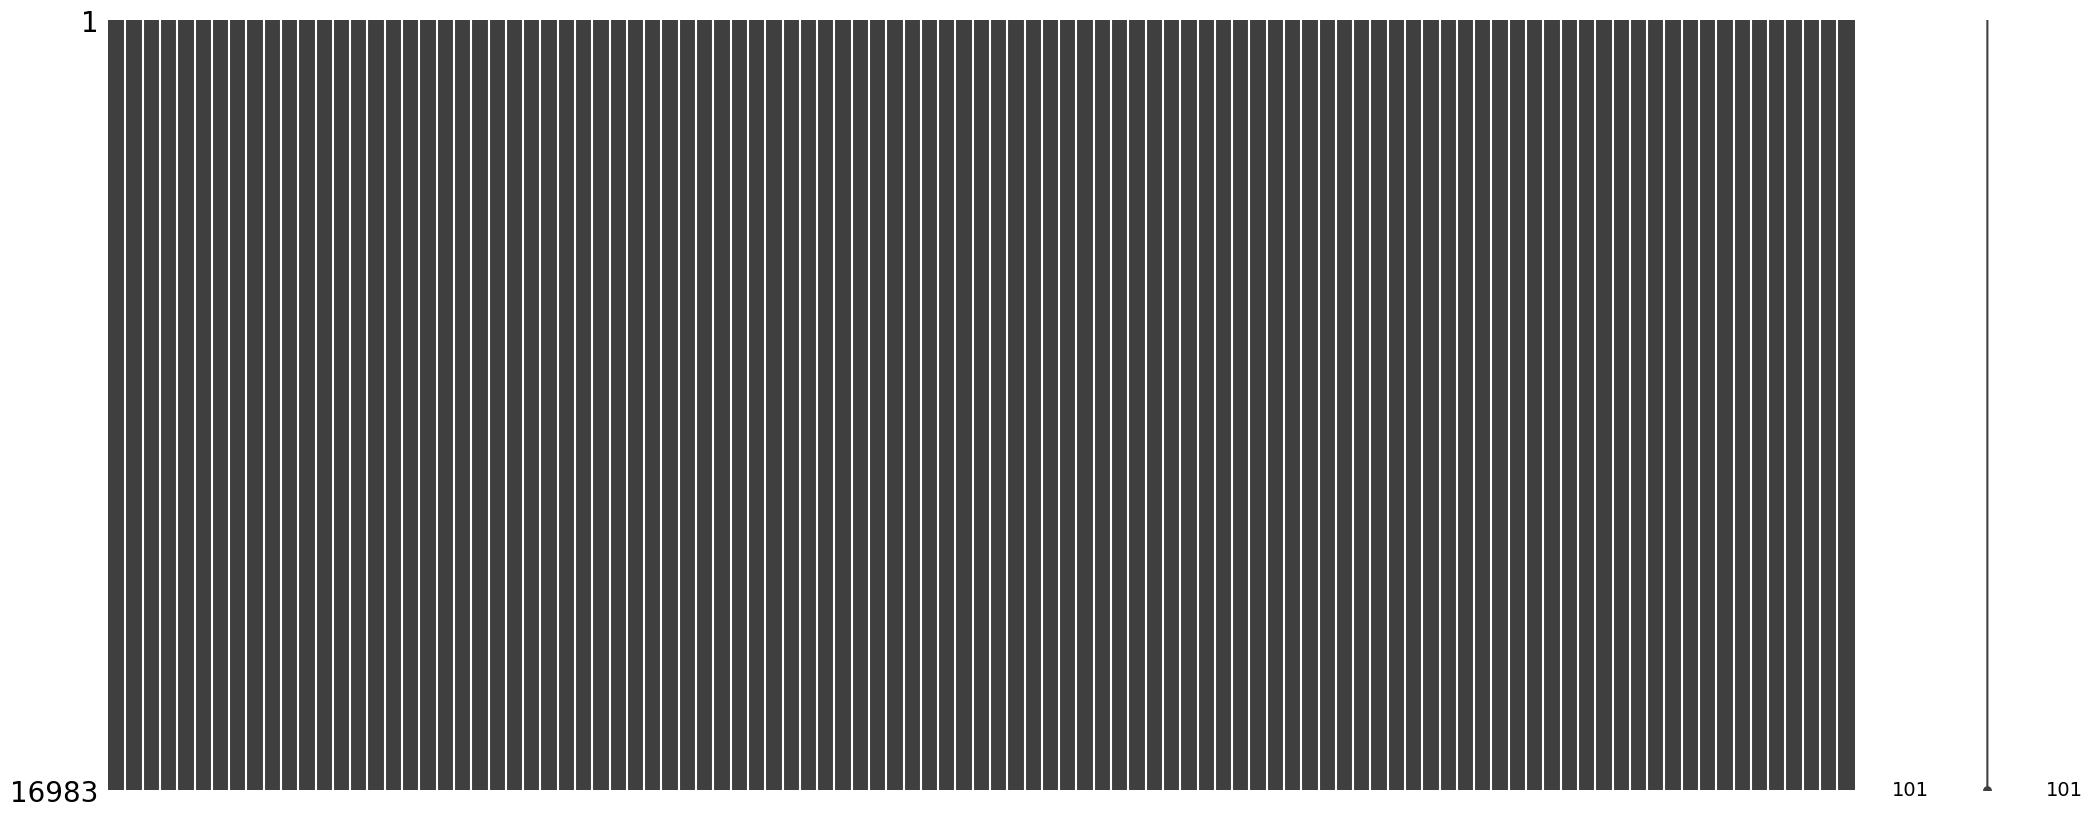

In [ ]:
import missingno as msno
msno.matrix(resample_df)
plt.show()

**Visualizing PQ class distribution using a Pie Chart**

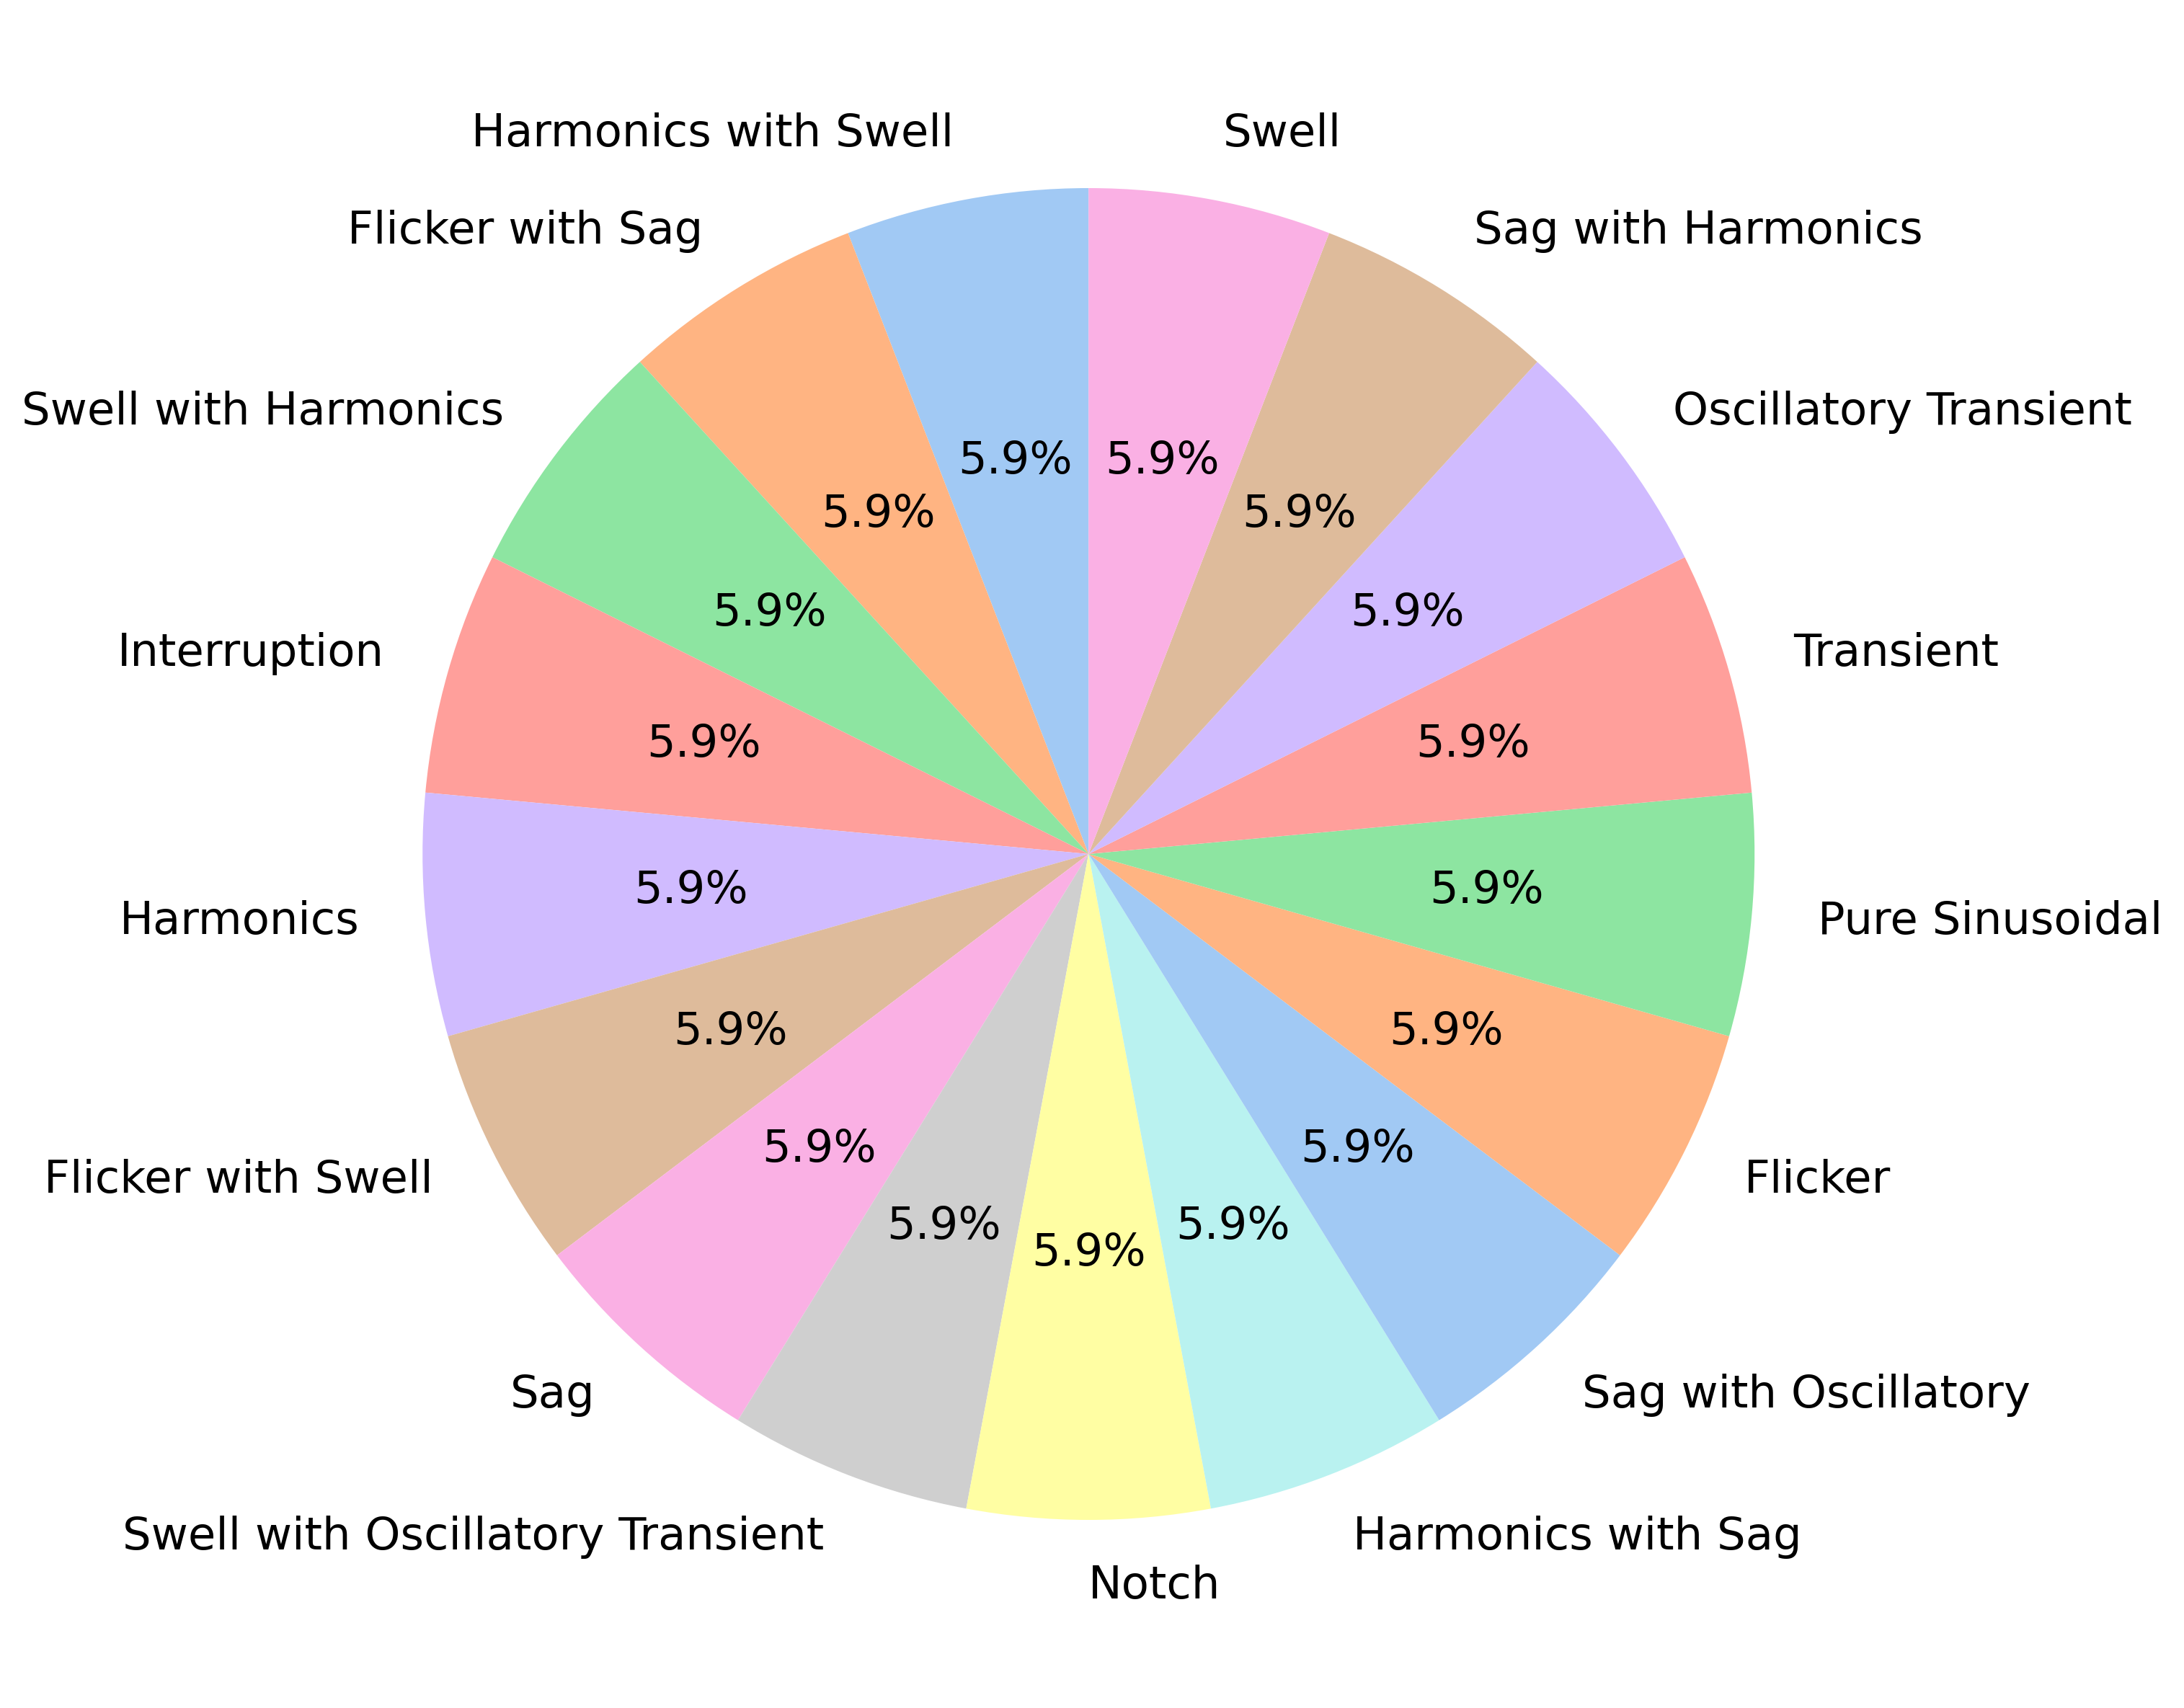

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregating counts for each category
category_counts = resample_df['Column_101'].value_counts()

# Pie chart visualization
plt.figure(figsize=(10, 8), dpi=300)  # High resolution and size

# Creating the pie chart
plt.pie(category_counts, labels=category_counts.index,
        autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette("pastel", len(category_counts)),
        textprops={'fontsize': 15, 'fontname': 'Arial'})

# Adding a title
#plt.title('Distribution of PQ Disturbances', fontdict={'fontname': 'Arial', 'fontsize': 20})

plt.tight_layout()
plt.savefig('PQD_pie.png', dpi=300, bbox_inches='tight', format='png')
plt.show()

**Seperating input features from target class columns**

In [ ]:
pqd_data_cleaned = resample_df
# Select numerical features
numerical_features = pqd_data_cleaned.iloc[:, :-1]

**Previewing the feature Matrix**

In [ ]:
numerical_features.head()

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,Column_91,Column_92,Column_93,Column_94,Column_95,Column_96,Column_97,Column_98,Column_99,Column_100
0,0.095917,0.153063,0.212028,0.273147,0.336276,0.400790,0.465618,0.529341,0.590324,0.646883,...,-0.701472,-0.603413,-0.507081,-0.414284,-0.326173,-0.243196,-0.165131,-0.091179,-0.020116,0.049515
1,0.967636,0.983320,0.995166,1.003109,1.007103,1.007117,1.003136,0.995158,0.983202,0.967300,...,0.541655,0.580890,0.617666,0.651846,0.683304,0.711927,0.737612,0.760270,0.936748,0.956769
2,-0.937272,-0.957311,-0.973572,-0.985991,-0.994519,-0.999122,-0.999781,-0.996495,-0.989277,-0.978154,...,-0.809065,-0.899237,-0.987655,-1.073017,-1.153995,-1.229331,-1.297921,-1.358886,-1.411624,-1.455838
3,0.000000,0.062791,0.125333,0.187381,0.248690,0.309017,0.368125,0.425779,0.481754,0.535827,...,-0.050972,-0.046466,-0.041777,-0.036923,-0.031923,-0.026798,-0.021566,-0.016250,-0.010869,-0.005445
4,-0.093190,-0.149109,-0.175381,-0.180893,-0.177200,-0.176275,-0.188286,-0.219817,-0.272843,-0.344641,...,0.953603,0.960631,0.927557,0.851659,0.736532,0.591511,0.430117,0.267803,0.119401,-0.003265


Extracting statistical features from the Signals such as Mean,Std,Skewness

In [ ]:
# Generate statistical features for each row
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)
scaled_df = pd.DataFrame(scaled_features, columns=numerical_features.columns)

# Statistical Features Extraction
stat_features = pd.DataFrame()
stat_features['mean'] = numerical_features.mean(axis=1)
stat_features['std_dev'] = numerical_features.std(axis=1)
stat_features['min'] = numerical_features.min(axis=1)
stat_features['max'] = numerical_features.max(axis=1)
stat_features['skewness'] = numerical_features.skew(axis=1)
stat_features['kurtosis'] = numerical_features.kurt(axis=1)
stat_features['median'] = numerical_features.median(axis=1)
stat_features['iqr'] = numerical_features.quantile(0.75, axis=1) - numerical_features.quantile(0.25, axis=1)
stat_features['range'] = stat_features['max'] - stat_features['min']
stat_features['energy'] = (numerical_features**2).sum(axis=1)
stat_features['rms'] = np.sqrt((numerical_features**2).mean(axis=1))
stat_features['variance'] = numerical_features.var(axis=1)
stat_features['entropy'] = -(numerical_features * np.log1p(numerical_features)).sum(axis=1)

# Frequency-Domain Features (Fourier Transform)
fft_vals = np.abs(fft(numerical_features, axis=1))
stat_features['fft_mean'] = fft_vals.mean(axis=1)
stat_features['fft_std_dev'] = fft_vals.std(axis=1)
stat_features['fft_max'] = fft_vals.max(axis=1)
stat_features['fft_energy'] = (fft_vals**2).sum(axis=1)

# Wavelet Transform Features
def extract_wavelet_features(data, wavelet='db4'):
    coeffs = pywt.wavedec(data, wavelet, level=5)
    return [np.mean(np.abs(c)) for c in coeffs]

wavelet_features = numerical_features.apply(extract_wavelet_features, axis=1, result_type="expand")
wavelet_features.columns = [f'wavelet_coef_{i}' for i in range(wavelet_features.shape[1])]
stat_features = pd.concat([stat_features, wavelet_features], axis=1)

# Signal Shape Features
stat_features['crest_factor'] = stat_features['max'] / stat_features['rms']
stat_features['impulse_factor'] = stat_features['max'] / stat_features['mean']
stat_features['shape_factor'] = stat_features['rms'] / stat_features['mean']


**Previewing extracted statistical features**

In [ ]:
stat_features.head()

,mean,std_dev,min,max,skewness,kurtosis,median,iqr,range,energy,...,fft_energy,wavelet_coef_0,wavelet_coef_1,wavelet_coef_2,wavelet_coef_3,wavelet_coef_4,wavelet_coef_5,crest_factor,impulse_factor,shape_factor
0,-7.034592e-02,0.798863,-1.253849,1.009019,-0.114411,-1.542148,-1.963916e-03,1.747679,2.262868,63.674862,...,6367.486212,2.170072,0.637564,0.324934,0.089455,0.017509,0.001549,1.264490,-1.434368e+01,-1.134345e+01
1,2.565453e-02,0.662251,-0.889270,1.007117,0.068435,-1.468954,3.310847e-04,1.270120,1.896388,43.484932,...,4348.493190,4.949774,0.390277,0.045844,0.025208,0.012235,0.004160,1.527252,3.925691e+01,2.570428e+01
2,-3.399867e-03,0.824652,-1.455838,1.394092,-0.020874,-1.419480,-6.076184e-03,1.644720,2.849929,67.326142,...,6732.614193,5.444369,0.704602,0.158398,0.058992,0.021950,0.004002,1.699024,-4.100430e+02,-2.413403e+02
3,2.344080e-01,0.406080,-0.086719,1.000000,0.979843,-0.820780,5.310002e-18,0.660521,1.086719,21.819932,...,2181.993154,1.041557,0.399090,0.111082,0.065394,0.018165,0.009776,2.140786,4.266065e+00,1.992756e+00
4,2.354280e-16,0.724023,-1.090403,1.090403,0.000000,-1.526276,8.500145e-16,1.492574,2.180805,51.896656,...,5189.665642,1.766336,0.526244,0.151525,0.255113,0.034124,0.001875,1.513621,4.631576e+15,3.059931e+15


**Appplying PCA for Dimensionality Reduction and creating the finale feature Dataset**

In [ ]:
# Apply PCA for Dimensionality Reduction
pca = PCA(n_components=10)
pca_features = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(pca_features, columns=[f'PC{i+1}' for i in range(10)])

# Combine all features
combined_features = pd.concat([scaled_df, stat_features, pca_df], axis=1)

# Add target variable back
final_dataset = pd.concat([combined_features,pqd_data_cleaned['Column_101']], axis=1)

**Previwing the PCA transformed finale Dataset**

In [ ]:
final_dataset.head()

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Column_101
0,0.142110,0.210963,0.282036,0.356102,0.429819,0.506196,0.581222,0.652191,0.716854,0.773894,...,-0.750592,-0.939816,-0.203694,0.277398,-0.189045,-0.464577,-0.509800,0.631578,-0.042961,Harmonics with Swell
1,1.551416,1.550796,1.542041,1.522633,1.491056,1.456052,1.413667,1.364219,1.308969,1.249677,...,-8.714408,0.260019,-0.826131,0.487859,-0.072177,0.024896,0.026602,-0.093794,-0.027674,Flicker with Sag
2,-1.528244,-1.580910,-1.625502,-1.656088,-1.675474,-1.686868,-1.688219,-1.680133,-1.663796,-1.639101,...,10.676997,-0.020779,-0.994895,-1.172946,-0.749740,-0.431061,0.334625,0.192430,0.228768,Swell with Harmonics
3,-0.012958,0.065285,0.142550,0.219043,0.291259,0.362427,0.430235,0.493892,0.553225,0.608989,...,-0.893291,3.538185,-0.529698,-0.787688,0.851347,-0.383850,0.309485,0.374189,-0.291119,Interruption
4,-0.163618,-0.276668,-0.341275,-0.369484,-0.382490,-0.397819,-0.431470,-0.492938,-0.584044,-0.698406,...,-0.958276,-0.385916,0.367351,-0.166792,0.631693,0.236473,-0.172149,1.022173,-0.568844,Harmonics


**Encoding PQ class labels into numerical values(Label Encoding)**

In [ ]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()

final_dataset['Column_101'] = lbl.fit_transform(final_dataset['Column_101'])

**Viewing the encoded PQ class labels(Label Encoded Classes)**

In [ ]:
lbl.classes_

array(['Flicker', 'Flicker with Sag', 'Flicker with Swell', 'Harmonics',
       'Harmonics with Sag', 'Harmonics with Swell', 'Interruption',
       'Notch', 'Oscillatory Transient', 'Pure Sinusoidal', 'Sag',
       'Sag with Harmonics', 'Sag with Oscillatory', 'Swell',
       'Swell with Harmonics', 'Swell with Oscillatory Transient',
       'Transient'], dtype=object)

**Mapping between encoded class labels and Actual PQ class labels**

In [ ]:
for i, class_name in enumerate(lbl.classes_):
    print(f"Encoded value {i} → Class label: {class_name}")

Encoded value 0 → Class label: Flicker
Encoded value 1 → Class label: Flicker with Sag
Encoded value 2 → Class label: Flicker with Swell
Encoded value 3 → Class label: Harmonics
Encoded value 4 → Class label: Harmonics with Sag
Encoded value 5 → Class label: Harmonics with Swell
Encoded value 6 → Class label: Interruption
Encoded value 7 → Class label: Notch
Encoded value 8 → Class label: Oscillatory Transient
Encoded value 9 → Class label: Pure Sinusoidal
Encoded value 10 → Class label: Sag
Encoded value 11 → Class label: Sag with Harmonics
Encoded value 12 → Class label: Sag with Oscillatory
Encoded value 13 → Class label: Swell
Encoded value 14 → Class label: Swell with Harmonics
Encoded value 15 → Class label: Swell with Oscillatory Transient
Encoded value 16 → Class label: Transient


**Viewing the finale Dataset with encoded class labels**

In [ ]:
final_dataset.head()

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Column_101
0,0.142110,0.210963,0.282036,0.356102,0.429819,0.506196,0.581222,0.652191,0.716854,0.773894,...,-0.750592,-0.939816,-0.203694,0.277398,-0.189045,-0.464577,-0.509800,0.631578,-0.042961,5
1,1.551416,1.550796,1.542041,1.522633,1.491056,1.456052,1.413667,1.364219,1.308969,1.249677,...,-8.714408,0.260019,-0.826131,0.487859,-0.072177,0.024896,0.026602,-0.093794,-0.027674,1
2,-1.528244,-1.580910,-1.625502,-1.656088,-1.675474,-1.686868,-1.688219,-1.680133,-1.663796,-1.639101,...,10.676997,-0.020779,-0.994895,-1.172946,-0.749740,-0.431061,0.334625,0.192430,0.228768,14
3,-0.012958,0.065285,0.142550,0.219043,0.291259,0.362427,0.430235,0.493892,0.553225,0.608989,...,-0.893291,3.538185,-0.529698,-0.787688,0.851347,-0.383850,0.309485,0.374189,-0.291119,6
4,-0.163618,-0.276668,-0.341275,-0.369484,-0.382490,-0.397819,-0.431470,-0.492938,-0.584044,-0.698406,...,-0.958276,-0.385916,0.367351,-0.166792,0.631693,0.236473,-0.172149,1.022173,-0.568844,3


**Plotting the PCA explained Variance and Cumulative variance**

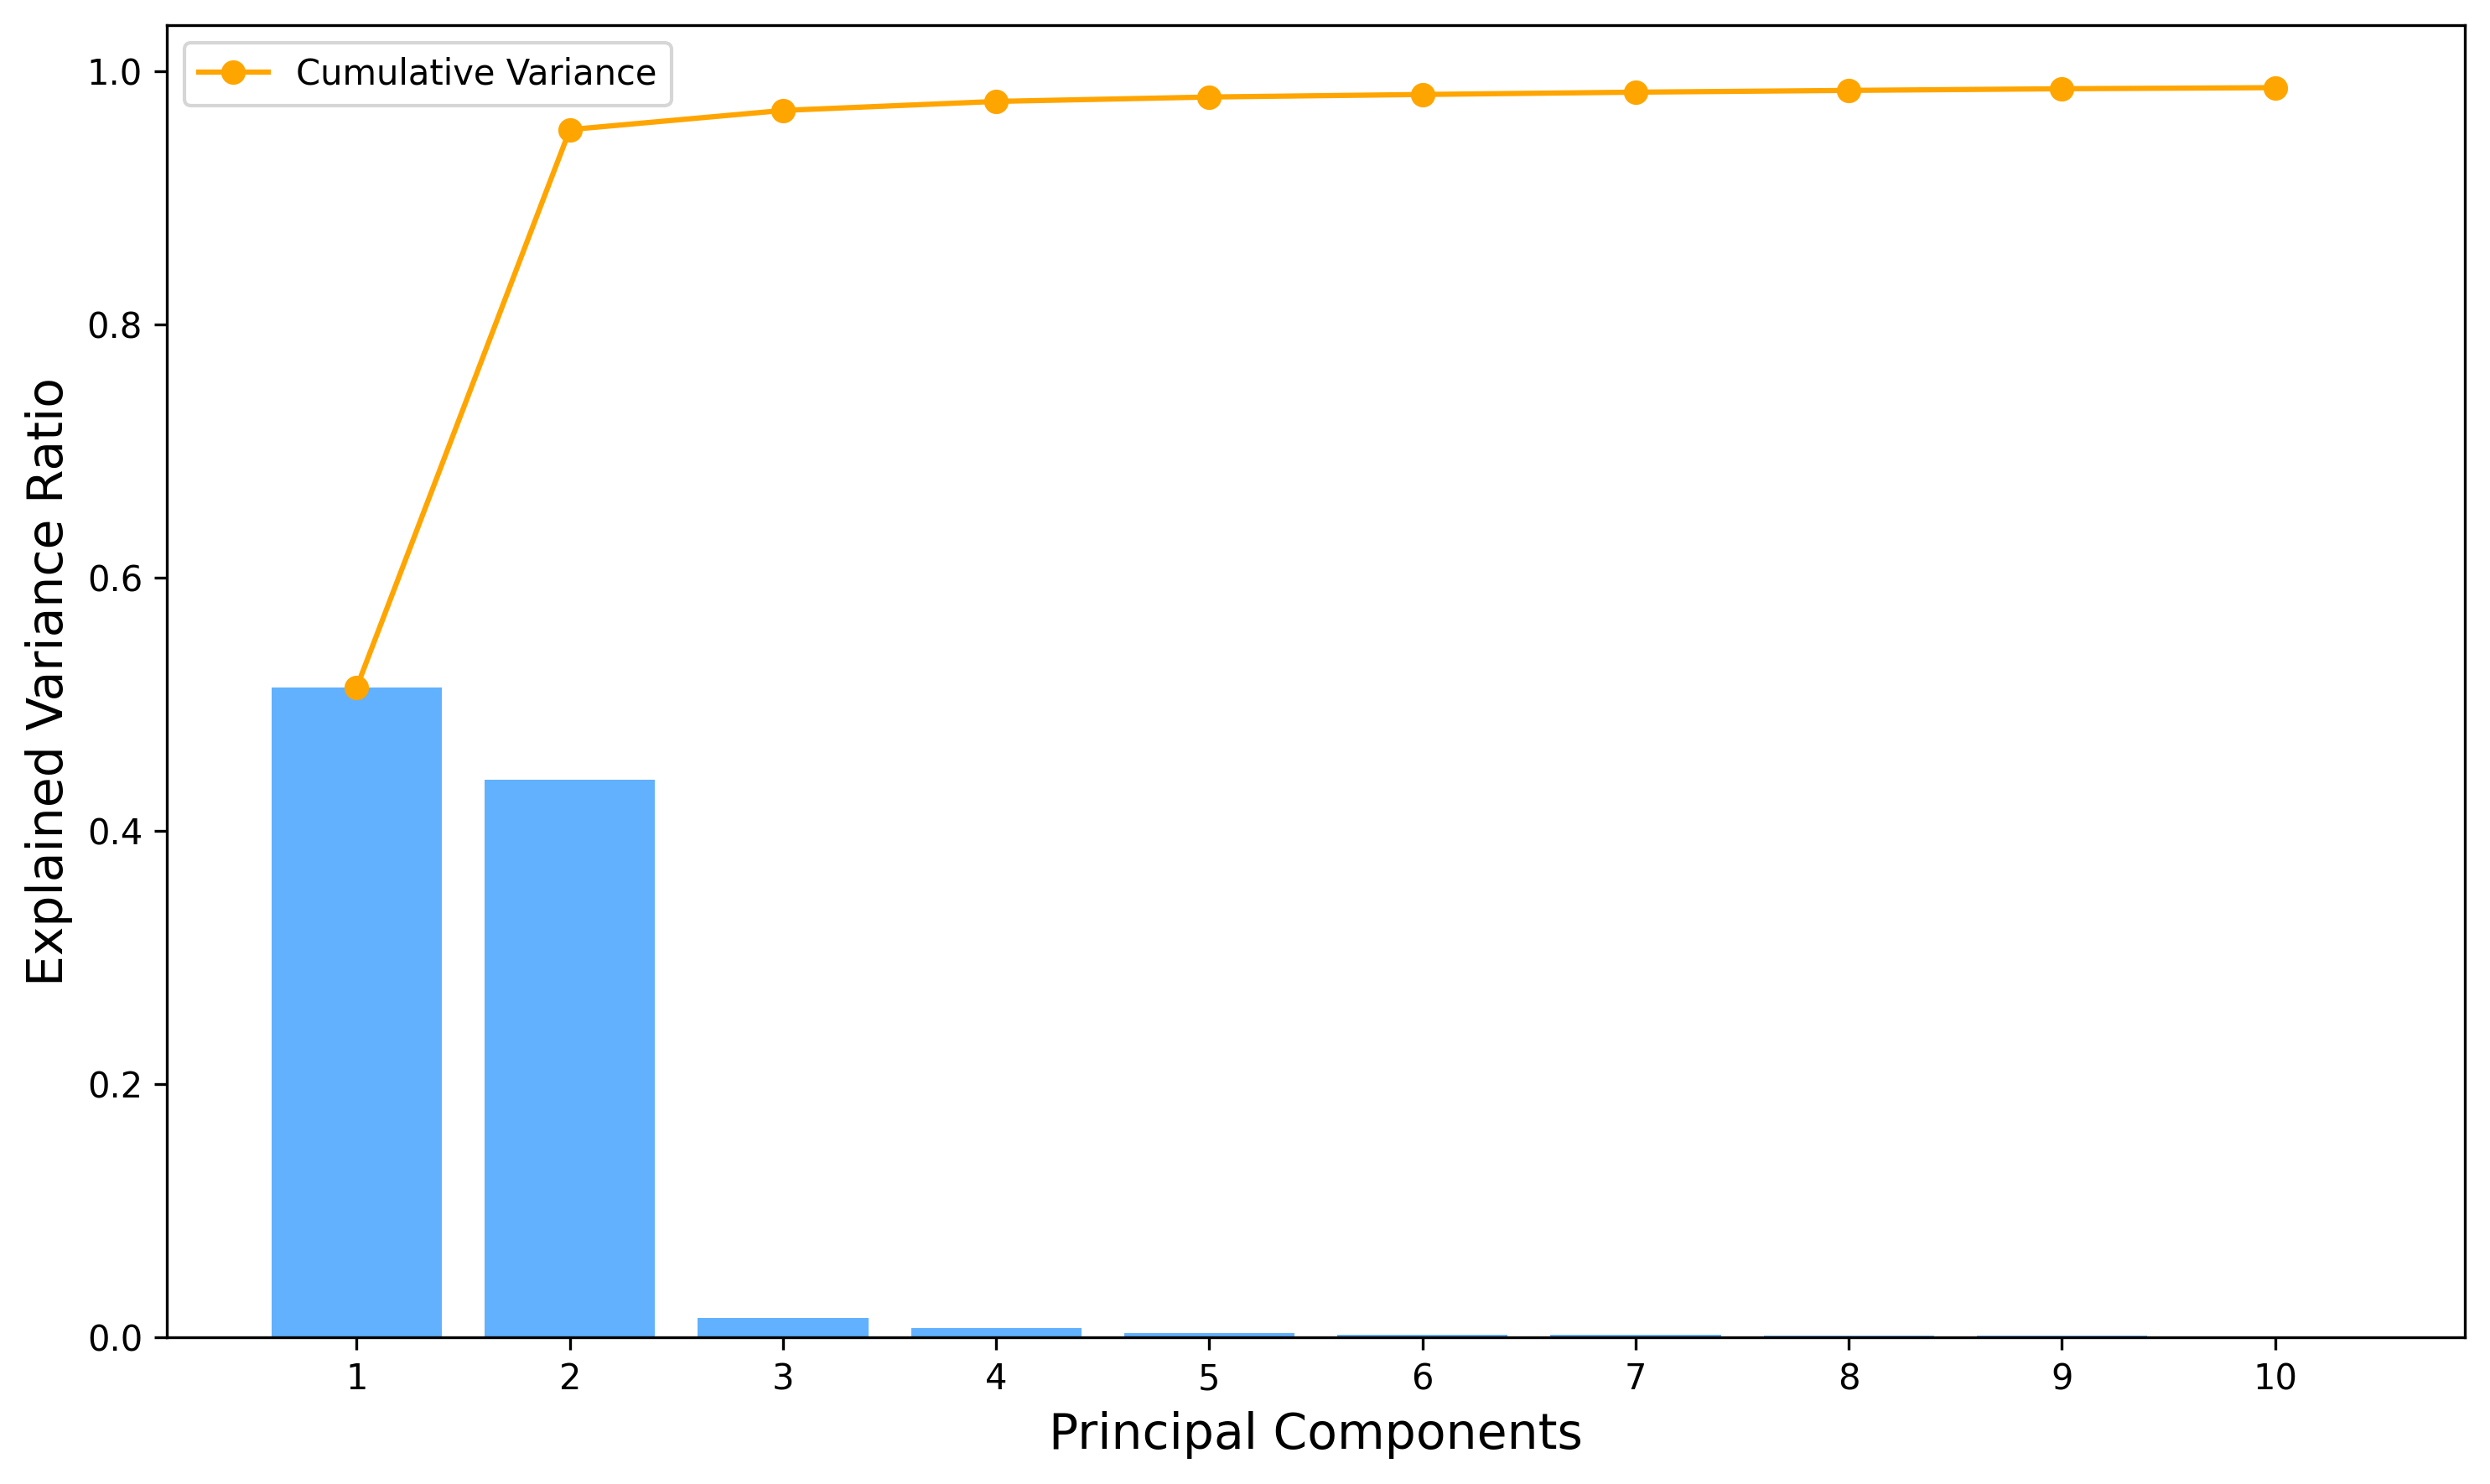

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# PCA Variance Plot
plt.figure(figsize=(10, 6), dpi=300)
pca = PCA(n_components=10)
pca_features = pca.fit_transform(scaled_features)
explained_variance = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='dodgerblue')
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o', color='orange', label='Cumulative Variance')
#plt.title('Explained Variance by PCA Components', fontsize=16, fontweight='bold')
plt.xlabel('Principal Components', fontsize=14,fontname='Arial')
plt.ylabel('Explained Variance Ratio', fontsize=14, fontname='Arial')
plt.xticks(range(1, len(explained_variance) + 1))
plt.legend()
plt.tight_layout()
plt.savefig('expv.png', dpi=400)
plt.show()


**Cleaning Statistical features(Handle InF/Null values) and plotting feature distribution**

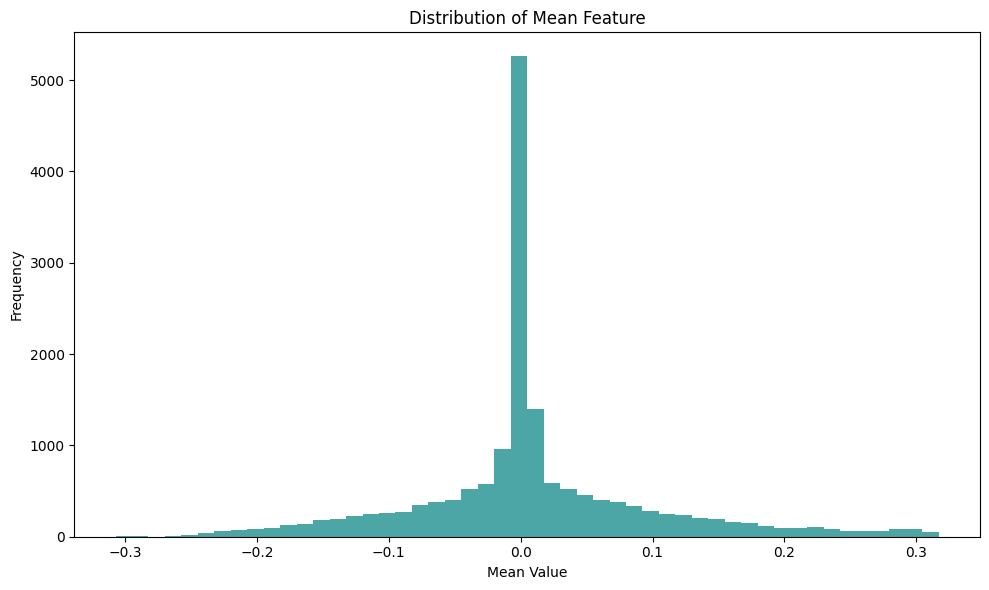

In [ ]:
# Statistical Features Distribution
# Replace Infinite Values with NaN
stat_features.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN Values (Choose One Option)
stat_features = stat_features.fillna(stat_features.mean())

stat_features['mean'].plot(kind='hist', bins=50, alpha=0.7, color='teal', figsize=(10, 6), title='Distribution of Mean Feature')
plt.xlabel('Mean Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Feature selection using variance threshold(Selecting High Variance features)**

In [ ]:
from sklearn.feature_selection import VarianceThreshold,chi2

# Drop the target variable
features = final_dataset.drop('Column_101', axis=1)

#  Replace Infinite Values with NaN
features.replace([np.inf, -np.inf], np.nan, inplace=True)

#  Fill NaN Values (Choose One Option)
features = features.fillna(features.mean())  # Option 1: Fill with mean
# features = features.dropna()               # Option 2: Drop rows with NaN

#  Apply Variance Threshold for Feature Selection
threshold = 0.9  # Adjust as needed
vr = VarianceThreshold(threshold=threshold)
vr.fit(features)

# Get selected features
selected_features = features.columns[vr.get_support()]

print("Selected Features:", selected_features)
print('\n length:',len(selected_features))

Selected Features: Index(['Column_1', 'Column_2', 'Column_3', 'Column_4', 'Column_5', 'Column_6',
       'Column_7', 'Column_8', 'Column_9', 'Column_10',
       ...
       'entropy', 'fft_std_dev', 'fft_max', 'fft_energy', 'wavelet_coef_0',
       'impulse_factor', 'shape_factor', 'PC1', 'PC2', 'PC3'],
      dtype='object', length=112)

 length: 112


**Scaling the features and encoding the target variable for Model Training**

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
lbl = LabelEncoder()
std = StandardScaler()
y = final_dataset['Column_101']

**Verifying feature Matrix and target vector shape**

In [ ]:
features.shape, y.shape

((16983, 136), (16983,))

**Finale cleaning step for features**

Selected features based on ANOVA F-Scores: ['fft_max', 'std_dev', 'iqr', 'fft_std_dev', 'rms', 'variance', 'range', 'fft_energy', 'energy', 'min', 'fft_mean', 'wavelet_coef_4', 'entropy', 'max', 'wavelet_coef_0']

ANOVA F-Scores:
             Feature      F_score
115         fft_max  3307.518956
101         std_dev  3259.745729
107             iqr  3140.764516
114     fft_std_dev  2983.171603
110             rms  2916.725351
111        variance  2522.242801
108           range  2507.995606
116      fft_energy  2395.659420
109          energy  2395.659420
102             min  1605.440344
113        fft_mean  1599.918274
121  wavelet_coef_4  1150.500510
112         entropy  1072.201778
103             max   971.179438
117  wavelet_coef_0   969.116665


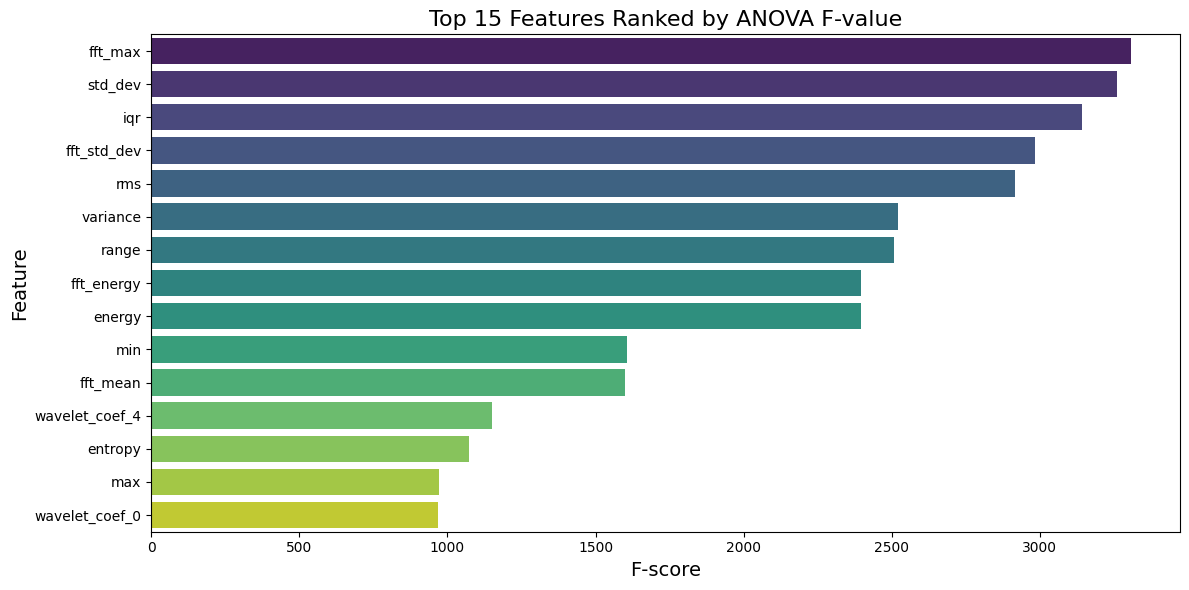

In [ ]:
#  Replace Infinite Values with NaN
features.replace([np.inf, -np.inf], np.nan, inplace=True)

#  Fill NaN Values (Choose One Option)
features = features.fillna(features.mean())

from sklearn.feature_selection import f_classif

# Compute ANOVA F-values
f_values, p_values = f_classif(features, y)

# Create DataFrame of results
anova_results = pd.DataFrame({'Feature': features.columns, 'F_score': f_values})
anova_results = anova_results.sort_values(by='F_score', ascending=False)

# Print the selected features
selected_features = anova_results['Feature'].head(15).tolist()
print("Selected features based on ANOVA F-Scores:", selected_features)
print("\nANOVA F-Scores:\n", anova_results.head(15))

# Step 4: Sort features by F-score (descending)
feature_scores = anova_results.sort_values(by='F_score', ascending=False).head(15)

# Step 5: Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='F_score', y='Feature', data=feature_scores, palette='viridis')
plt.title('Top 15 Features Ranked by ANOVA F-value', fontsize=16)
plt.xlabel('F-score', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()

**Computing correlation matrix of selected features**

Selected features based on correlation threshold 0.8:
['fft_max', 'std_dev', 'iqr', 'fft_std_dev', 'rms', 'variance', 'range', 'fft_energy', 'energy', 'min', 'fft_mean', 'wavelet_coef_4', 'entropy', 'max', 'wavelet_coef_0']


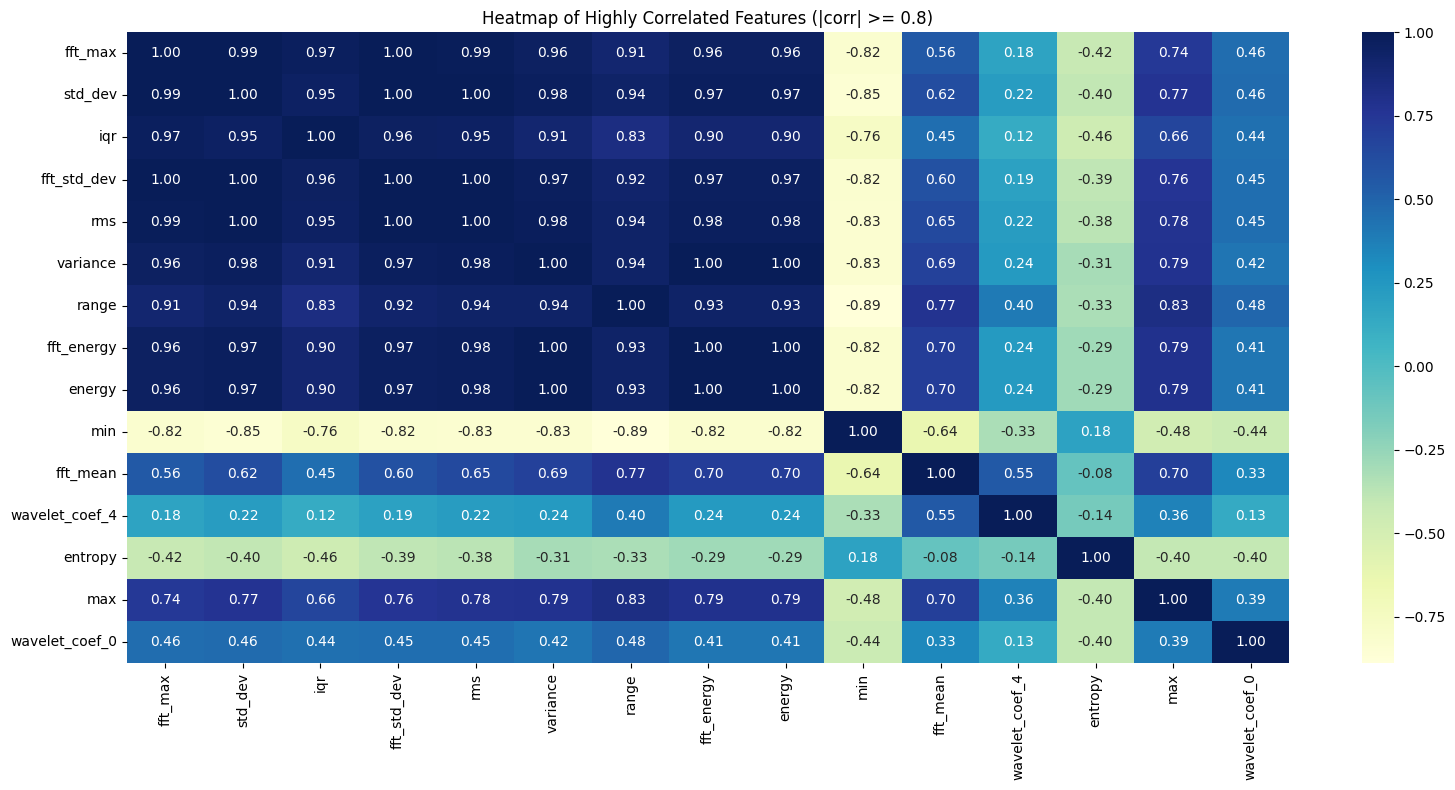

In [ ]:
# Compute the correlation matrix
correlation_matrix = final_dataset[list(selected_features)].corr()

# Define a threshold for correlation
threshold = 0.8

# Identify highly correlated features
high_corr_pairs = correlation_matrix[(correlation_matrix.abs() >= threshold) & (correlation_matrix.abs() < 1)]
selected_features_ = high_corr_pairs.columns[high_corr_pairs.any()].tolist()

#selected_features.extend(['Label', 'Attack Type', 'Attack Tool'])

# Create a new DataFrame with only selected features
filtered_df = final_dataset[selected_features_]

# Display the selected features
print(f"Selected features based on correlation threshold {threshold}:\n{selected_features}")

# Plot the filtered heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title(f"Heatmap of Highly Correlated Features (|corr| >= {threshold})")
plt.tight_layout()
plt.savefig('heatmap.png')
plt.show()

**Correlation Analysis on selected High Variance Features**

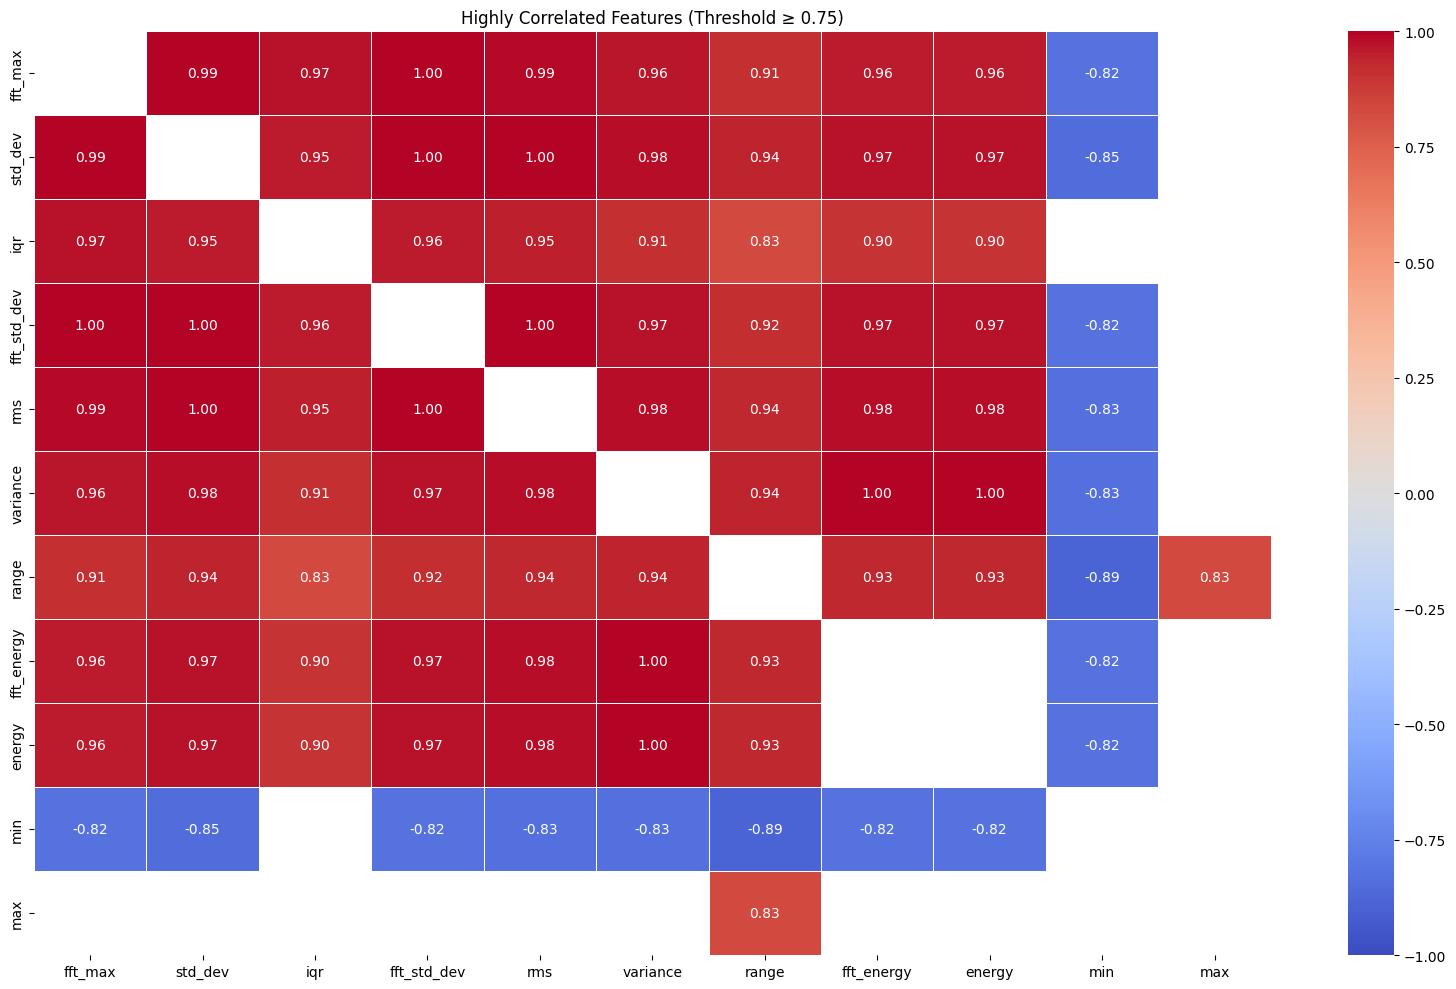

In [ ]:
# Compute correlation matrix for selected high-variance features
correlation_matrix = final_dataset[selected_features].corr()

# Define threshold for high correlation (e.g., |0.75| or above)
threshold = 0.8

# Filter only highly correlated features
high_corr_features = correlation_matrix[(correlation_matrix.abs() >= threshold) & (correlation_matrix.abs() < 1.0)]

# Drop rows and columns that are entirely NaN (i.e., no strong correlation)
high_corr_features = high_corr_features.dropna(how='all', axis=0).dropna(how='all', axis=1)

# Plot heatmap only if there are highly correlated features
if not high_corr_features.empty:
    plt.figure(figsize=(16, 10))
    sns.heatmap(high_corr_features, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
    plt.title('Highly Correlated Features (Threshold ≥ 0.75)')
    plt.tight_layout()
    plt.savefig('high_correlation_heatmap.png', dpi=300)
    plt.show()
else:
    print("No features with correlation above the threshold.")

**Finding features which are mostly corelated with the PQ class labels**

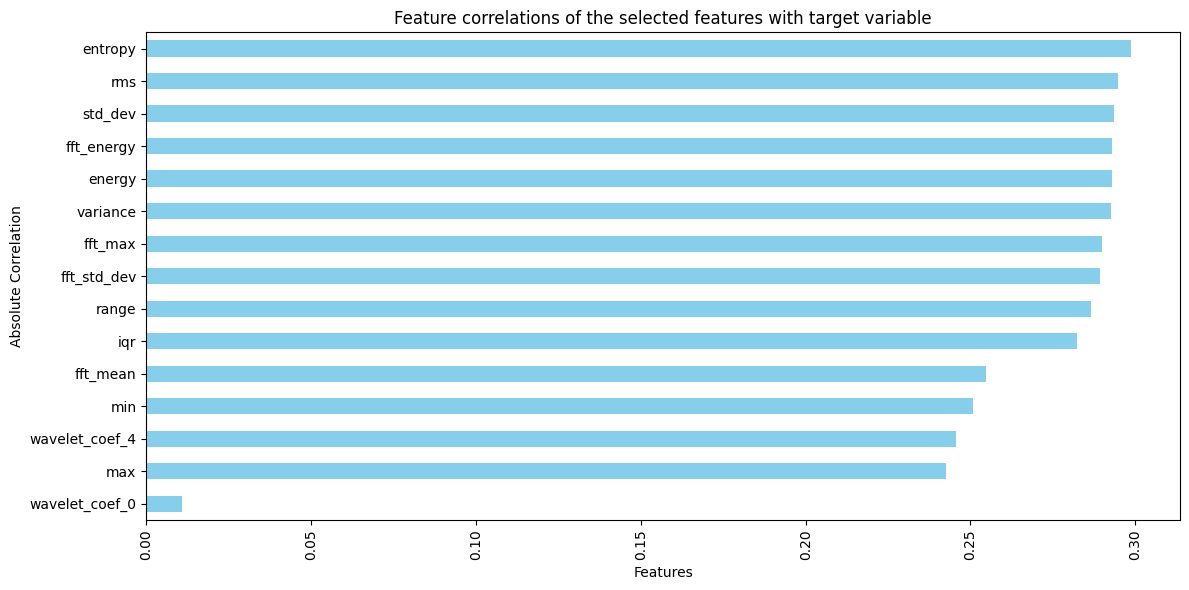

In [ ]:
correlations = pd.concat([final_dataset[selected_features],final_dataset['Column_101']],axis=1).corr()['Column_101'].drop('Column_101')
sorted_correlations = correlations.abs().sort_values(ascending=True).head(20)


plt.figure(figsize=(12,6))
sorted_correlations.plot(kind='barh',color='skyblue',title='Feature correlations of the selected features with target variable')
plt.xlabel('Features')
plt.ylabel('Absolute Correlation')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Finale feature scaling and target encoding befor the Train/Test split**

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
lbl = LabelEncoder()
std = StandardScaler()

X = final_dataset.drop(['Column_101','wavelet_coef_0'],axis=1)

# Handle Inf and NaN values before training
X.replace([np.inf, -np.inf], np.nan, inplace=True)  # Convert infinite values to NaN
X.fillna(X.mean(), inplace=True)  # Replace NaN with mean values

# Standardize the data
X_scaled = std.fit_transform(X)

y = final_dataset['Column_101']

**Train /Test split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,random_state=42,test_size=0.2)

**Verifying the Train and Test Dimensions**

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13586, 135), (3397, 135), (13586,), (3397,))

**Defining and preparing multiple ML models (RF,XGB,ExtraTrees,SVM,MLP,Stacking)**

Accuracy of RandomForest: 75.7727 %
Recall of RandomForest: 75.7727 %
Precision of RandomForest: 75.1922 %
F1 Score of RandomForest: 75.4691 %
ROC AUC of RandomForest: 98.6856 %
--------------------------------------------------
Accuracy of XGBoost: 76.5087 %
Recall of XGBoost: 76.5087 %
Precision of XGBoost: 76.5227 %
F1 Score of XGBoost: 76.5015 %
ROC AUC of XGBoost: 99.3926 %
--------------------------------------------------
Accuracy of ExtraTrees: 74.2714 %
Recall of ExtraTrees: 74.2714 %
Precision of ExtraTrees: 73.3373 %
F1 Score of ExtraTrees: 73.7463 %
ROC AUC of ExtraTrees: 87.6110 %
--------------------------------------------------
Accuracy of SVM: 69.6791 %
Recall of SVM: 69.6791 %
Precision of SVM: 67.9283 %
F1 Score of SVM: 67.9381 %
ROC AUC of SVM: 99.0693 %
--------------------------------------------------
Accuracy of MLP: 80.7183 %
Recall of MLP: 80.7183 %
Precision of MLP: 79.0745 %
F1 Score of MLP: 79.3872 %
ROC AUC of MLP: 99.4951 %
-------------------------------

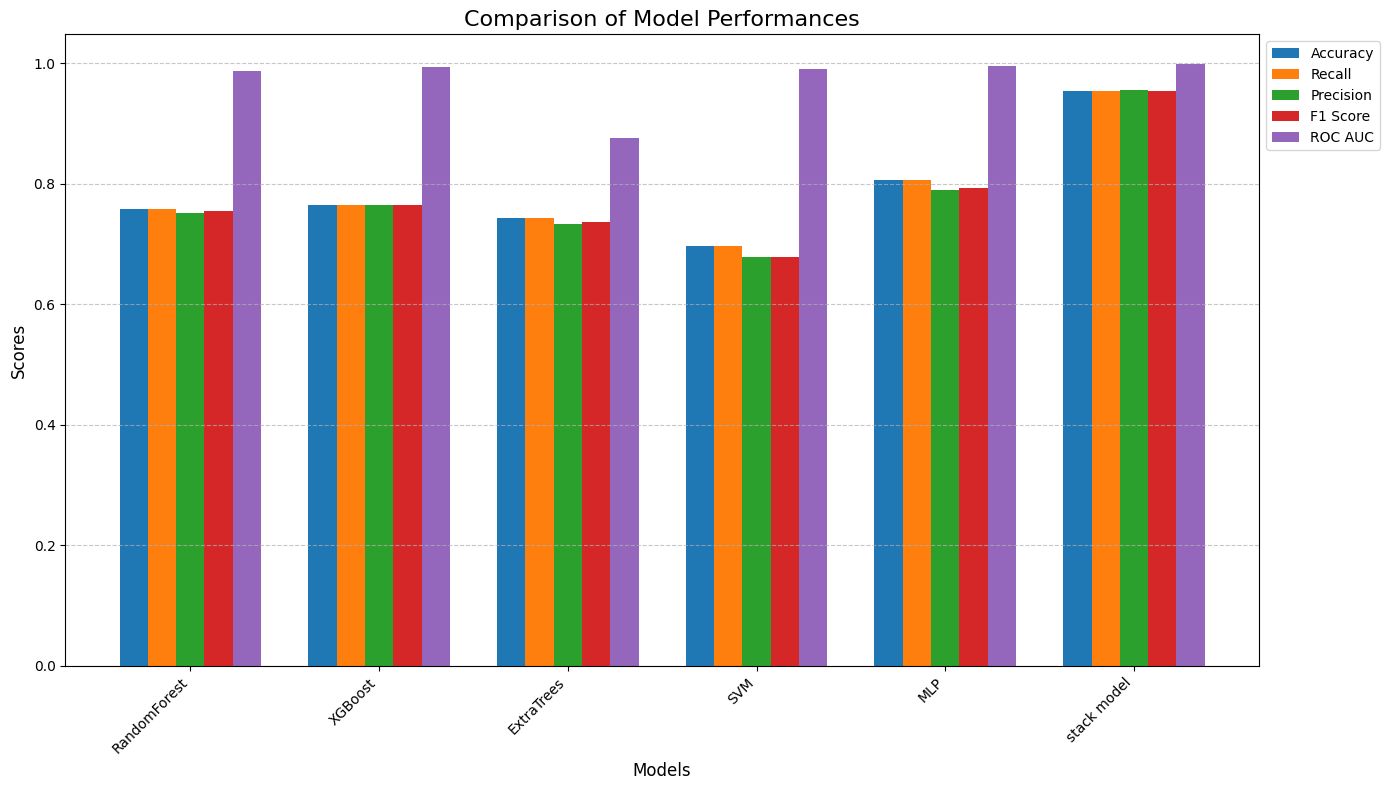


Performance Comparison Table:
          Model  Accuracy    Recall  Precision  F1 Score   ROC AUC
0  RandomForest  0.757727  0.757727   0.751922  0.754691  0.986856
1       XGBoost  0.765087  0.765087   0.765227  0.765015  0.993926
2    ExtraTrees  0.742714  0.742714   0.733373  0.737463  0.876110
3           SVM  0.696791  0.696791   0.679283  0.679381  0.990693
4           MLP  0.807183  0.807183   0.790745  0.793872  0.994951
5   stack model  0.954960  0.954960   0.955597  0.954907  0.998391


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier


rf = RandomForestClassifier(random_state = 42, criterion='gini')
xgb = XGBClassifier(random_state=42)
ext = ExtraTreesClassifier(random_state=42)
sv = SVC(kernel='rbf', probability=True)
mlp = MLPClassifier(hidden_layer_sizes=(100,),max_iter = 500,random_state=42)


# Stacking Classifier (Combining multiple models)
stacking_model = StackingClassifier(
    estimators=[
        ('xgb', xgb),
        ('svm', sv),
    ],
    final_estimator=RandomForestClassifier(n_estimators=100, random_state=42)
)
models = {'RandomForest': rf,
          'XGBoost': xgb,
          'ExtraTrees':ext,
          'SVM': sv,
          'MLP': mlp,
          'stack model': stacking_model}


model_names = []
accuracies = []
recalls = []
precisions = []
f1_scores = []
roc_auc_scores = []


# Check if the target variable is multiclass
is_multiclass = len(np.unique(y)) > 2

if is_multiclass:
    # Binarize the output for multiclass classification
    y_test_bin = label_binarize(y_test, classes=np.unique(y))
    n_classes = y_test_bin.shape[1]

# Train models and evaluate performance
for key, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate accuracy, recall, precision, and F1 score
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Handle ROC AUC calculation for binary vs. multiclass
    if is_multiclass:
        # Predict probabilities for all classes
        y_prob = model.predict_proba(X_test)

        # Compute micro-average ROC AUC
        fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
        roc_auc = auc(fpr, tpr)
    else:
        # For binary classification, compute ROC AUC directly
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

    # Store metrics
    model_names.append(key)
    accuracies.append(acc)
    recalls.append(recall)
    precisions.append(precision)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)

    # Print metrics
    print(f"Accuracy of {key}: {acc * 100:.4f} %")
    print(f"Recall of {key}: {recall * 100:.4f} %")
    print(f"Precision of {key}: {precision * 100:.4f} %")
    print(f"F1 Score of {key}: {f1 * 100:.4f} %")
    print(f"ROC AUC of {key}: {roc_auc * 100:.4f} %")
    print("-" * 50)

# Create a DataFrame for comparison
performance_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracies,
    "Recall": recalls,
    "Precision": precisions,
    "F1 Score": f1_scores,
    "ROC AUC": roc_auc_scores
})
# Plot comparison chart
metrics = ["Accuracy", "Recall", "Precision", "F1 Score", "ROC AUC"]
x = np.arange(len(model_names))  # X-axis positions for the models
width = 0.15  # Width of the bars

fig, ax = plt.subplots(figsize=(14, 8))
for i, metric in enumerate(metrics):
    ax.bar(x + i * width, performance_df[metric], width, label=metric)

ax.set_xlabel("Models", fontsize=12)
ax.set_ylabel("Scores", fontsize=12)
ax.set_title("Comparison of Model Performances", fontsize=16)
ax.set_xticks(x + width * (len(metrics) - 1) / 2)
ax.set_xticklabels(model_names, rotation=45, ha="right")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=10)
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

# Display the performance DataFrame
print("\nPerformance Comparison Table:")
print(performance_df)

**Evaluating the models using the confusion matrices**

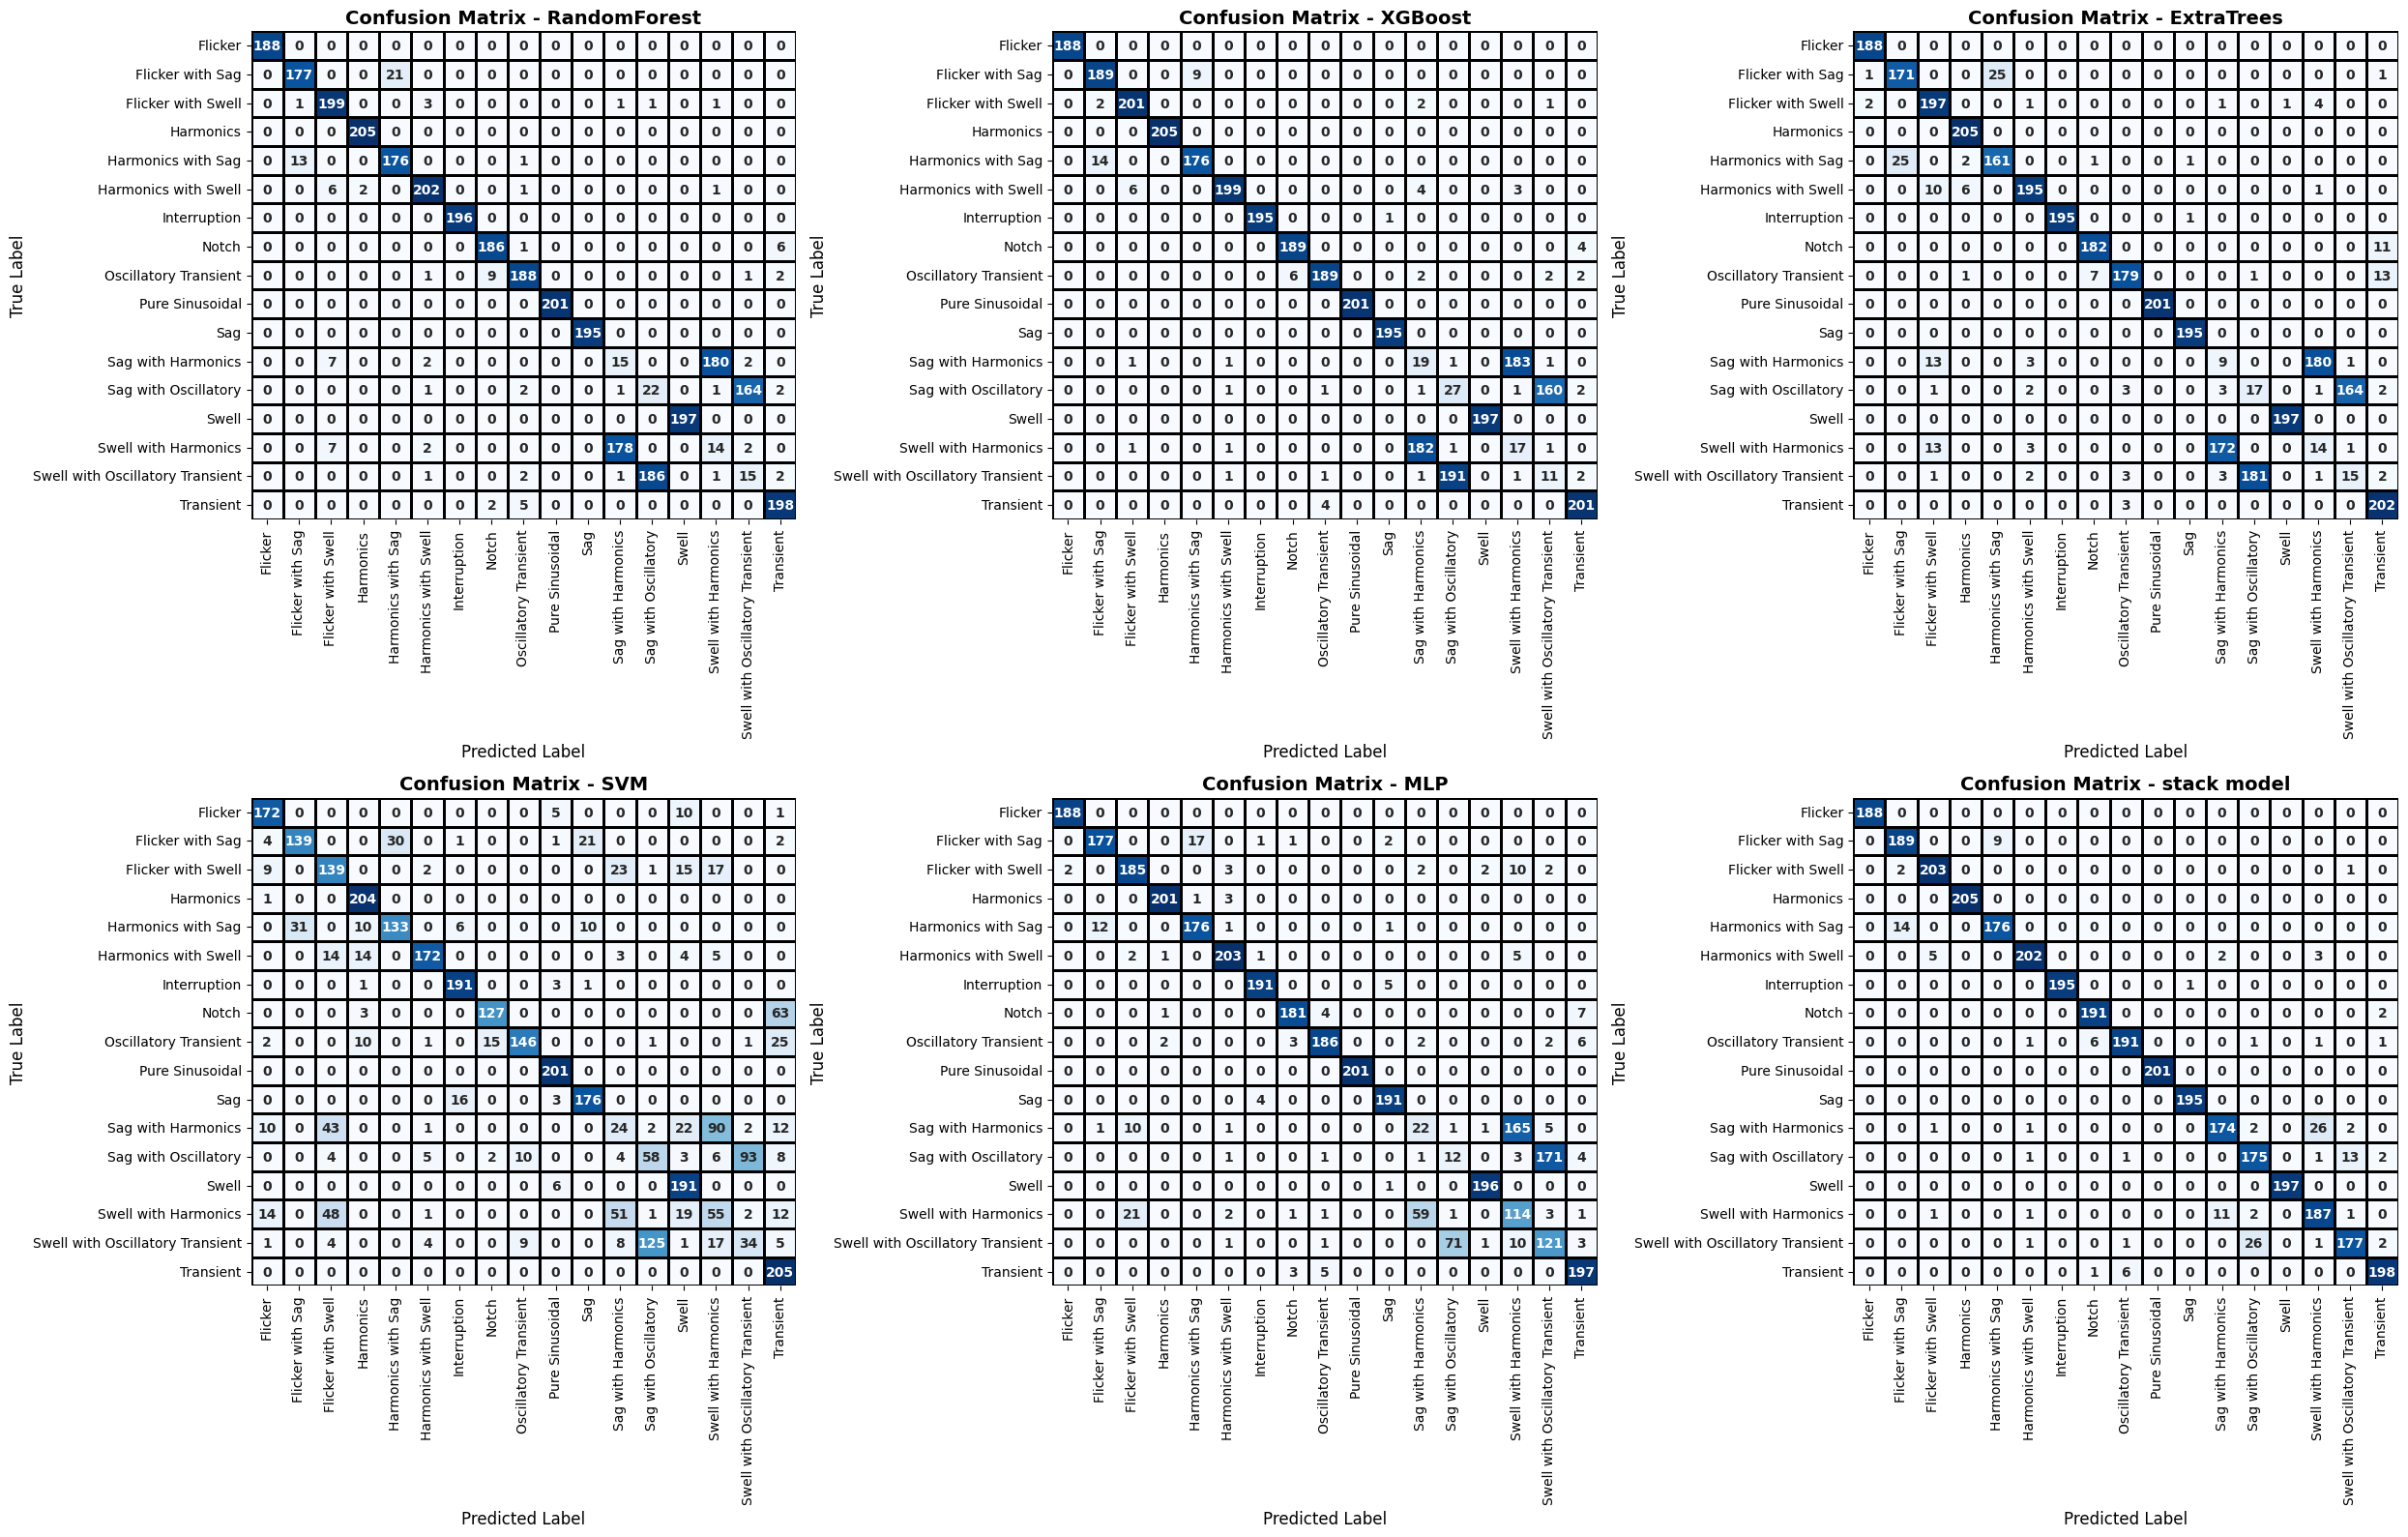

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Class Labels
class_labels = ['Flicker', 'Flicker with Sag', 'Flicker with Swell', 'Harmonics',
                'Harmonics with Sag', 'Harmonics with Swell', 'Interruption',
                'Notch', 'Oscillatory Transient', 'Pure Sinusoidal', 'Sag',
                'Sag with Harmonics', 'Sag with Oscillatory', 'Swell',
                'Swell with Harmonics', 'Swell with Oscillatory Transient', 'Transient']

# Increase figure size for better clarity
fig, axes = plt.subplots(2, 3, figsize=(25, 16))  # Larger figure size
axes = axes.flatten()

for i, (key, model) in enumerate(models.items()):
    #model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    # Create heatmap with larger, clearer annotations
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels,
                yticklabels=class_labels, ax=axes[i], annot_kws={"size": 10, 'weight': 'bold'}, linewidths=1, linecolor='black',cbar=False)

    axes[i].set_title(f"Confusion Matrix - {key}", fontsize=14, fontweight="bold")
    axes[i].set_xlabel("Predicted Label", fontsize=12)
    axes[i].set_ylabel("True Label", fontsize=12)
    axes[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better visibility
    axes[i].tick_params(axis='y', rotation=0)   # Keep y-axis labels readable

# Hide unused subplots if models are fewer than 6
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()

# Save as high-resolution image
plt.savefig("confusion_matrices_high_res.png", dpi=600, bbox_inches="tight")  # High-resolution PNG
plt.show()


**Training a XGBoost for feature importance and explainability**

In [ ]:
from xgboost import plot_importance

xgb = XGBClassifier(random_state=42)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

**Visualizing the top feature importances from XGBoost**

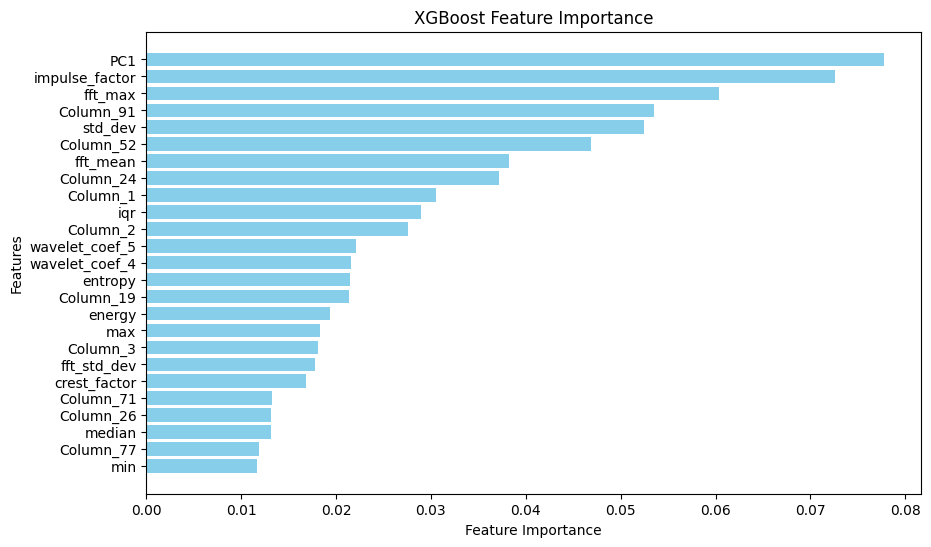

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances
feature_importance = xgb.feature_importances_

# Create a DataFrame for visualization
feature_names = X.columns  # Ensure X_train is a DataFrame
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})

# Sort by importance
importance_df = importance_df.sort_values(by="Importance", ascending=False).head(25)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()
plt.savefig('xgboost feature importance.png',dpi=400)
plt.show()

**Importing Deep Learning libraries for Neural Networks and LSTM Models**

In [ ]:
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from keras.callbacks import Callback

**Building a Dense Neural Network Model for PQ Disturbance Classification**

In [ ]:
model = Sequential()
model.add(Dense(units = 128, activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dense(units= 64,activation='relu',kernel_regularizer = l2(0.0001)))
model.add(Dropout(0.5))
model.add(Dense(units=17,activation='softmax',kernel_regularizer=l2(0.0001)))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 17)             │         1,105 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,769 (104.57 KB)

 Trainable params: 26,769 (104.57 KB)

 Non-trainable params: 0 (0.00 B)

**Compiling and training the Neurak Network with early stopping callback**

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


# Define a custom callback to stop training when validation accuracy >= 90%
class StopAt90PercentAccuracy(Callback):
    def on_epoch_end(self, epoch, logs=None):
        val_accuracy = logs.get('val_accuracy')
        if val_accuracy is not None and val_accuracy >= 0.95:
            print(f"\nStopping training as validation accuracy reached {val_accuracy:.2f}")
            self.model.stop_training = True

# Instantiate the custom callback
stop_at_90 = StopAt90PercentAccuracy()

# Train the model with the custom callback
history = model.fit(X_train, y_train,
                    batch_size=32,
                    validation_split=0.2,
                    epochs=500,
                    callbacks=[stop_at_90])

Epoch 1/500
340/340 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2572 - loss: 2.3516 - val_accuracy: 0.6266 - val_loss: 1.1976
Epoch 2/500
340/340 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5433 - loss: 1.3210 - val_accuracy: 0.6972 - val_loss: 0.8599
Epoch 3/500
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6308 - loss: 1.0223 - val_accuracy: 0.7141 - val_loss: 0.7180
Epoch 4/500
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6682 - loss: 0.8861 - val_accuracy: 0.7472 - val_loss: 0.6617
Epoch 5/500
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6973 - loss: 0.8078 - val_accuracy: 0.7539 - val_loss: 0.6135
Epoch 6/500
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7100 - loss: 0.7676 - val_accuracy: 0.7601 - val_loss: 0.5934
Epoch 7/500
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7225 - loss: 0.7313 - val_accuracy: 0.7664 - val_loss: 0.5665
Epoch 8/500
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7296 - loss: 0.6854 - val_accu

**Evaluating the Neural Network performance on Test DataSet**

In [ ]:
model.evaluate(X_test,y_test)

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8247 - loss: 0.4443


[0.457792729139328, 0.8201354146003723]

**Plotting the neural network Training and Validation Accuracy and Loss**

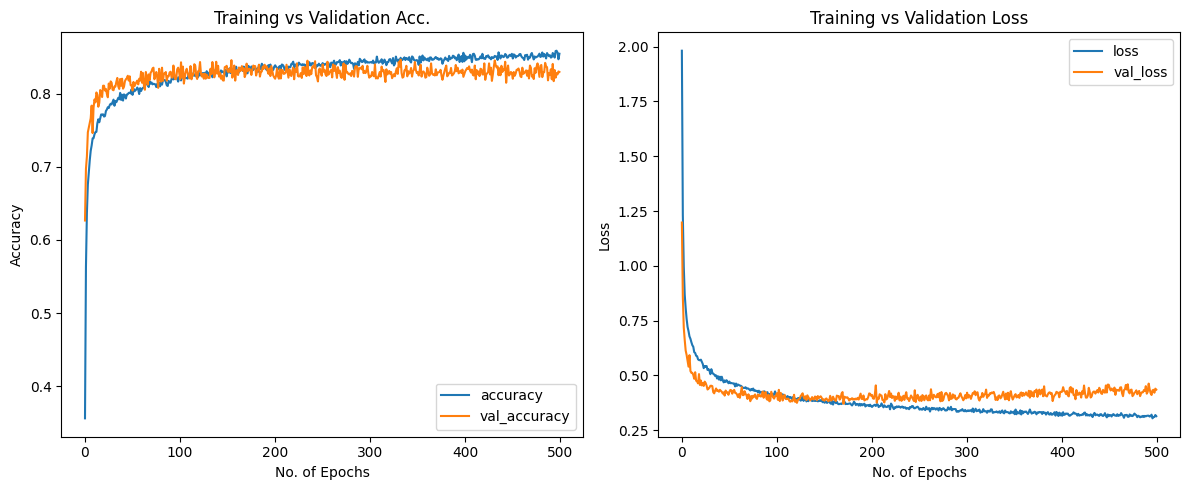

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(12,5))
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot(ax=ax[0])
ax[0].set_xlabel('No. of Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Training vs Validation Acc.')


pd.DataFrame(history.history)[['loss','val_loss']].plot(ax=ax[1])
ax[1].set_xlabel('No. of Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_title('Training vs Validation Loss')

plt.tight_layout()
plt.savefig('ANN performance.png',dpi=400)
plt.show()

**Preparing the Multiclass Evaluation(Predicted Classes and Binarized Labels)**

In [ ]:
# Check if the target variable is multiclass
is_multiclass = len(np.unique(y)) > 2

if is_multiclass:
    # Binarize the output for multiclass classification
    y_test_bin = label_binarize(y_test, classes=np.unique(y))
    n_classes = y_test_bin.shape[1]


# Class Labels
class_labels = ['Flicker', 'Flicker with Sag', 'Flicker with Swell', 'Harmonics',
                'Harmonics with Sag', 'Harmonics with Swell', 'Interruption',
                'Notch', 'Oscillatory Transient', 'Pure Sinusoidal', 'Sag',
                'Sag with Harmonics', 'Sag with Oscillatory', 'Swell',
                'Swell with Harmonics', 'Swell with Oscillatory Transient', 'Transient']



# Convert predicted probabilities to class labels (index of highest probability)
predicted_classes = np.argmax(model.predict(X_test), axis=1)

print(f"accuracy score : {accuracy_score(y_test,predicted_classes):.6f}")
print(f"precision score : {precision_score(y_test,predicted_classes,average='weighted'):.6f}")
print(f"recall score : {recall_score(y_test,predicted_classes,average='weighted'):.6f}")
print(f"f1 score : {f1_score(y_test,predicted_classes,average='weighted'):.6f}")


    # Handle ROC AUC calculation for binary vs. multiclass
if is_multiclass:
        # Predict probabilities for all classes
    y_prob = model.predict(X_test)

        # Compute micro-average ROC AUC
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
    roc_auc = auc(fpr, tpr)
    print(f" Roc Auc score : {roc_auc:.6f}")
else:
        # For binary classification, compute ROC AUC directly
    y_prob = model.predict(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
accuracy score : 0.820135
precision score : 0.819458
recall score : 0.820135
f1 score : 0.817072
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
 Roc Auc score : 0.994644


**Plotting the Confusion Matrix for Neural Networks Predictions**

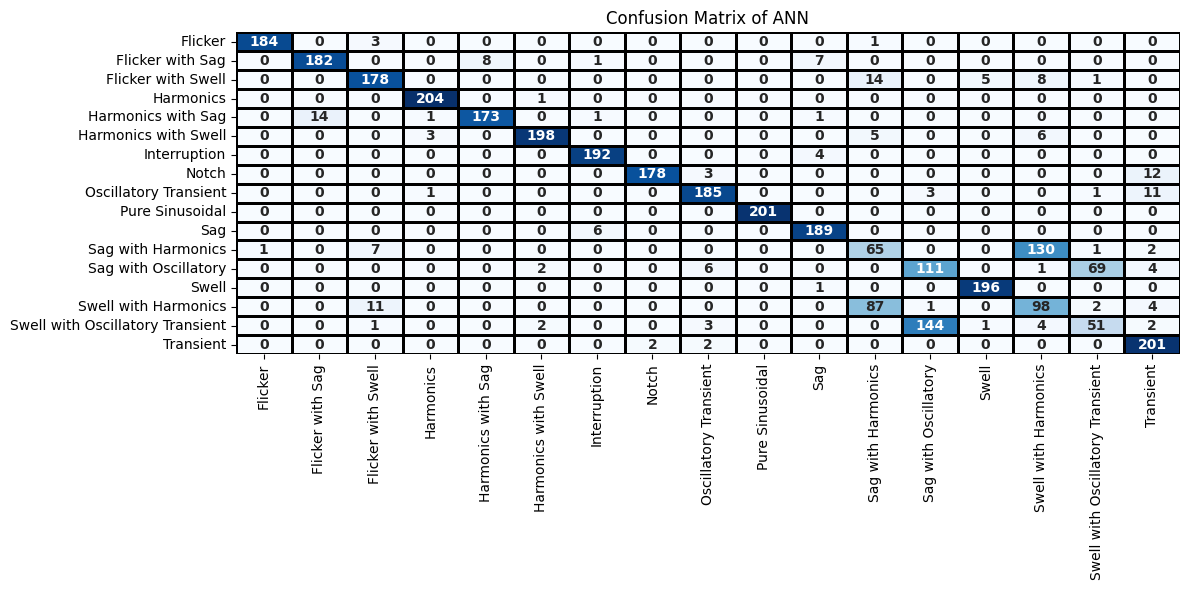

In [ ]:
cnf = confusion_matrix(y_test,predicted_classes)
plt.figure(figsize=(12,6))
# Create heatmap with larger, clearer annotations
sns.heatmap(cnf, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels,
                yticklabels=class_labels, annot_kws={"size": 10, 'weight': 'bold'}, linewidths=1, linecolor='black',cbar=False)

plt.title('Confusion Matrix of ANN')
plt.tight_layout()
plt.show()

**Building and Training LSTM Model for PQ classification**

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1],1))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))


lb = LabelBinarizer()
y_train_onehot = lb.fit_transform(y_train)
y_test_onehot = lb.transform(y_test)

model_lstm = Sequential()
model_lstm.add(LSTM(64, input_shape=(X_train_lstm.shape[1],1), return_sequences = True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(32, return_sequences=False))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(16,activation='relu'))
model_lstm.add(Dense(17,activation='softmax'))

model_lstm.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history_lstm = model_lstm.fit(X_train_lstm, y_train_onehot, epochs=100, batch_size=128, validation_split=0.1)

Epoch 1/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 265ms/step - accuracy: 0.0997 - loss: 2.7126 - val_accuracy: 0.2723 - val_loss: 2.2491
Epoch 2/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 25s 256ms/step - accuracy: 0.2605 - loss: 2.1935 - val_accuracy: 0.3606 - val_loss: 1.9133
Epoch 3/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 24s 247ms/step - accuracy: 0.3524 - loss: 1.9142 - val_accuracy: 0.4062 - val_loss: 1.7453
Epoch 4/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 24s 251ms/step - accuracy: 0.3920 - loss: 1.7633 - val_accuracy: 0.5040 - val_loss: 1.4461
Epoch 5/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 25s 263ms/step - accuracy: 0.4619 - loss: 1.5330 - val_accuracy: 0.5614 - val_loss: 1.3144
Epoch 6/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 25s 257ms/step - accuracy: 0.4912 - loss: 1.4510 - val_accuracy: 0.5489 - val_loss: 1.2464
Epoch 7/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 23s 243ms/step - accuracy: 0.5217 - loss: 1.3068 - val_accuracy: 0.6130 - val_loss: 1.1130
Epoch 8/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 24s 252ms/step - accuracy: 0.5493 - loss: 1.2172 - 

**Plotting the LSTM Training Vs Validation Accuracy and Loss**

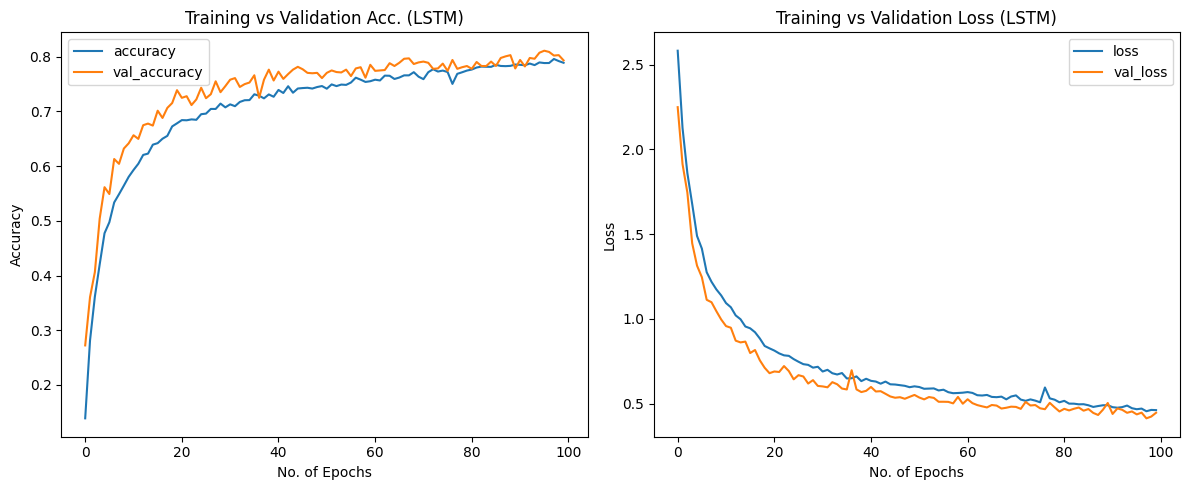

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(12,5))
pd.DataFrame(history_lstm.history)[['accuracy','val_accuracy']].plot(ax=ax[0])
ax[0].set_xlabel('No. of Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Training vs Validation Acc. (LSTM)')


pd.DataFrame(history_lstm.history)[['loss','val_loss']].plot(ax=ax[1])
ax[1].set_xlabel('No. of Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_title('Training vs Validation Loss (LSTM)')

plt.tight_layout()
plt.savefig('LSTM performance.png',dpi=400)
plt.show()

**Evaluating the LSTM performance (Accuracy,F1 Score,Precission,Recall)**

107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step
accuracy score lstm: 0.772152
precision score lstm: 0.740707
recall score lstm: 0.772152
f1 score lstm: 0.745453
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step
 Roc Auc score lstm : 0.991015


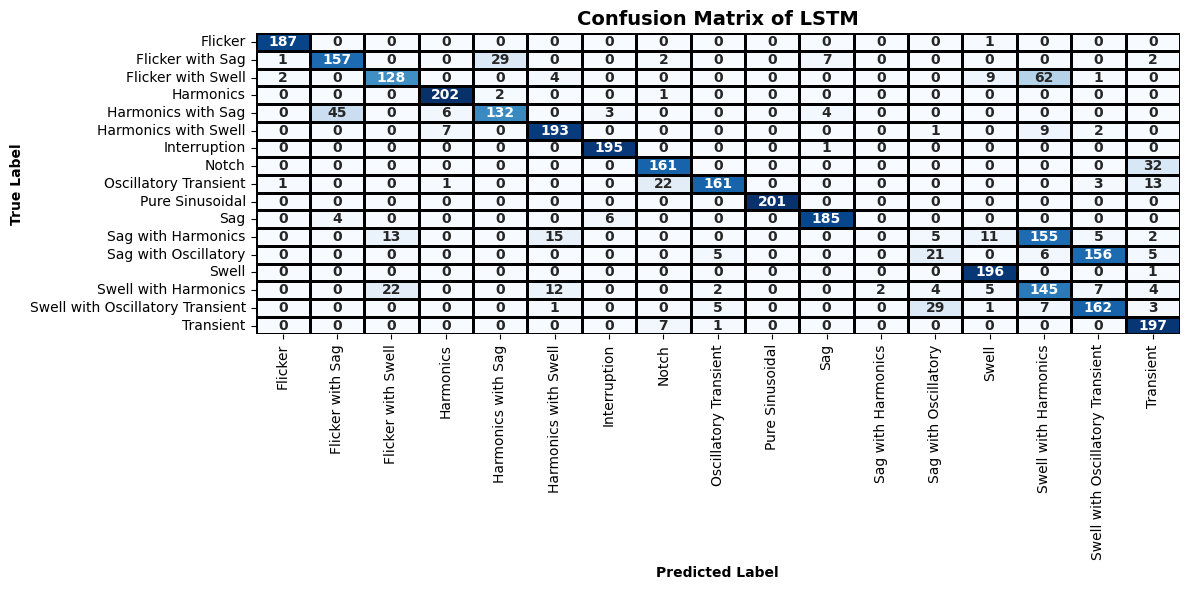

In [ ]:
# Check if the target variable is multiclass
is_multiclass = len(np.unique(y)) > 2
y_test_bin = label_binarize(y_test, classes=np.unique(y))

class_labels = ['Flicker', 'Flicker with Sag', 'Flicker with Swell', 'Harmonics',
                'Harmonics with Sag', 'Harmonics with Swell', 'Interruption',
                'Notch', 'Oscillatory Transient', 'Pure Sinusoidal', 'Sag',
                'Sag with Harmonics', 'Sag with Oscillatory', 'Swell',
                'Swell with Harmonics', 'Swell with Oscillatory Transient', 'Transient']

# Convert predicted probabilities to class labels (index of highest probability)
predicted_classes_lstm = np.argmax(model_lstm.predict(X_test), axis=1)

print(f"accuracy score lstm: {accuracy_score(y_test,predicted_classes_lstm):.6f}")
print(f"precision score lstm: {precision_score(y_test,predicted_classes_lstm,average='weighted'):.6f}")
print(f"recall score lstm: {recall_score(y_test,predicted_classes_lstm,average='weighted'):.6f}")
print(f"f1 score lstm: {f1_score(y_test,predicted_classes_lstm,average='weighted'):.6f}")

    # Handle ROC AUC calculation for binary vs. multiclass
if is_multiclass:
        # Predict probabilities for all classes
    y_prob = model_lstm.predict(X_test)

        # Compute micro-average ROC AUC
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
    roc_auc = auc(fpr, tpr)
    print(f" Roc Auc score lstm : {roc_auc:.6f}")
else:
        # For binary classification, compute ROC AUC directly
    y_prob = model_lstm.predict(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

cnf = confusion_matrix(y_test,predicted_classes_lstm)
plt.figure(figsize=(12,6))
# Create heatmap with larger, clearer annotations
sns.heatmap(cnf, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels,
                yticklabels=class_labels, annot_kws={"size": 10, 'weight': 'bold'}, linewidths=1, linecolor='black',cbar=False)

plt.title('Confusion Matrix of LSTM', fontsize=14, fontweight="bold")
plt.xlabel('Predicted Label',fontsize=10,fontweight='bold')
plt.ylabel('True Label',fontsize=10,fontweight='bold')
plt.tight_layout()
plt.show()